## IMPORTING LIBRARIES

In [1]:
# basic operations
import numpy as np

# for dataframe manipulations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#ingore warning
import warnings
warnings.filterwarnings('ignore')

import ipywidgets as widgets
from ipywidgets import interact

# for date time manipulation
import datetime

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# setting up the background style for the plots
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import scipy.stats as stats

from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from xgboost import XGBClassifier


# READING DATA

In [2]:
data = pd.read_csv("c:fifa.csv")
data.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

In [3]:
data.shape

(18207, 89)

In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
#calculating the mean,std,count,max and many more
pd.set_option('max_columns',100)
data.iloc[:,2:].describe().style.background_gradient(cmap='cividis')

In [6]:
data.iloc[:,13:].describe(include='object')

Preferred Foot       Work Rate Body Type Real Face Position  \
count           18159           18159     18159     18159    18147   
unique              2               9        10         2       27   
top             Right  Medium/ Medium    Normal        No       ST   
freq            13948            9810     10595     16505     2152   

             Joined Loaned From Contract Valid Until Height  Weight     LS  \
count         16654        1264                17918  18159   18159  16122   
unique         1736         341                   36     21      57     93   
top     Jul 1, 2018    Atalanta                 2019    6'0  165lbs   61+2   
freq           1538          20                 4819   2881    1483    705   

           ST     RS     LW     LF     CF     RF     RW    LAM    CAM    RAM  \
count   16122  16122  16122  16122  16122  16122  16122  16122  16122  16122   
unique     93     93    105    102    102    102    105    101    101    101   
top      61+2   61+2   63+2   61+2   61+2   61+2   63+2   61+2   61+2   61+2   
freq      705    705    745    713    713    713    745    744    744    744   

           LM    LCM     CM    RCM     RM    LWB    LDM    CDM    RDM    RWB  \
count   16122  16122  16122  16122  16122  16122  16122  16122  16122  16122   
unique    100     92     92     92    100     95     99     99     99     95   
top      61+2   58+2   58+2   58+2   61+2   61+2   62+2   62+2   62+2   61+2   
freq      804    762    762    762    804    713    660    660    660    713   

           LB    LCB     CB    RCB     RB Release Clause  
count   16122  16122  16122  16122  16122          16643  
unique     98    108    108    108     98           1244  
top      61+2   63+2   63+2   63+2   61+2          €1.1M  
freq      669    634    634    634    669            557

In [7]:
#dropping no required columns and sorting id column in ascedning order
data.drop(columns =['Unnamed: 0','Photo','Flag','Club Logo',"Joined"],inplace=True)
data.sort_values(by='ID',ascending=True,inplace=True)


# Missing Values and Data Cleaning

In [8]:
#checking for the missing values in columns
pd.set_option("max_rows",89)
data.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS                           2085
LW                           2085
LF                           2085
CF                           2085
RF            

In [9]:
x=data.isnull().sum()
y=(data.isnull().sum()/data.shape[0])*100
z={'Number of missing values':x,'Percentage of missing values':y}
df=pd.DataFrame(z,columns=['Number of missing values','Percentage of missing values'])
df = df.sort_values(by='Percentage of missing values',ascending=False)
df.head()

Number of missing values  Percentage of missing values
Loaned From                     16943                     93.057615
RDM                              2085                     11.451639
LCM                              2085                     11.451639
RS                               2085                     11.451639
ST                               2085                     11.451639

In [10]:

data.isnull().sum(axis=1).sort_values(ascending=False)

13240    74
13278    74
13283    74
13252    74
13244    74
         ..
3487      1
2826      1
7019      1
2271      1
17931     1
Length: 18207, dtype: int64

In [11]:
data.isnull().any(axis=1).sum()

18207

In [12]:
data[data.isnull().sum(axis=1)>50]


ID            Name  Age       Nationality  Overall  Potential  \
13251  134968    R. Haemhouts   34           Belgium       62         62   
13238  139317        J. Stead   35           England       62         62   
13268  153148      L. Garguła   37            Poland       62         62   
13253  171320       G. Miller   31          Scotland       62         62   
13236  177971      J. McNulty   33          Scotland       62         62   
13247  189238         F. Hart   28           Austria       62         62   
13237  195380      J. Barrera   29         Nicaragua       62         62   
13255  196921        L. Sowah   25           Germany       62         65   
13264  201019      M. Chergui   29            France       62         62   
13256  202809       R. Deacon   26           England       62         62   
13240  209462      R. Bingham   24           England       62         66   
13276  211006      M. Al Amri   26      Saudi Arabia       62         63   
13248  211511   L. McCullough   24  Northern Ireland       62         69   
13281  212800  Jwa Joon Hyeop   27    Korea Republic       62         62   
13271  213821    F. Sepúlveda   26             Chile       62         63   
13277  215102    J. Rebolledo   26             Chile       62         62   
13241  219702    K. Dankowski   21            Poland       62         72   
13261  221498   H. Al Mansour   25      Saudi Arabia       62         64   
13265  221499      D. Gardner   28           England       62         62   
13249  224055       Li Yunqiu   27          China PR       62         62   
13252  225336       E. Binaku   22           Albania       62         70   
13242  225590       I. Colman   23         Argentina       62         70   
13257  226617   Jang Hyun Soo   25    Korea Republic       62         65   
13258  230713     A. Al Malki   23      Saudi Arabia       62         67   
13282  231232      O. Marrufo   25            Mexico       62         65   
13283  232256     Han Pengfei   25          China PR       62         66   
13243  233782       M. Feeney   19           England       62         78   
13259  234809     E. Guerrero   27             Chile       62         65   
13266  237371    L. Bengtsson   20            Sweden       62         73   
13244  239158        R. Minor   30           Denmark       62         62   
13279  239679    P. Mazzocchi   22             Italy       62         69   
13239  240437     A. Semprini   20             Italy       62         72   
13272  240701       L. Spence   22          Scotland       62         70   
13273  242237      B. Lepistu   25           Estonia       62         67   
13267  242491    F. Jaramillo   22          Colombia       62         70   
13245  242998          Klauss   21            Brazil       62         69   
13246  244022      I. Sissoko   22            France       62         68   
13262  244026         H. Paul   24           Germany       62         66   
13274  244029     A. Abruscia   27             Italy       62         62   
13250  244535       F. Garcia   29          Paraguay       62         62   
13263  244538        S. Bauer   25           Austria       62         66   
13269  244540       S. Rivera   26          Colombia       62         64   
13275  244541     E. González   23         Venezuela       62         70   
13280  244543       Y. Ammour   19            France       62         77   
13270  245564        Vinicius   19            Brazil       62         77   
13260  246073         Hernáiz   20             Spain       62         69   
13278  246078      C. Mamengi   17       Netherlands       62         79   
13254  246328      A. Aidonis   17           Germany       62         82   

                                Club  Value Wage  Special Preferred Foot  \
13251                      NAC Breda  €150K  €2K     1665            NaN   
13238                   Notts County  €140K  €3K     1573            NaN   
13268                  Miedź Legnica  €100K  €1K     1542 

In [13]:
print("Before deleting the rows ",data.shape[0])
data=data[data.isnull().sum(axis=1)<=50]
print("After removing the rows having more than 50 missing values ",data.shape[0])

Before deleting the rows  18207
After removing the rows having more than 50 missing values  18159


In [14]:
for i in df.index:
    if df["Percentage of missing values"][i]>60:
        data.drop([i],axis=1,inplace=True)

In [15]:
#Player who have missing value in jersey number means that they donot have jersey number so it will be illogical to impute the 
#missing values using mean,median or mode. So let's impute the missing value as NA
data['Jersey Number'].fillna('NA',inplace=True)

In [16]:
#using mode for categorically columns
list= ["Club","Position","Contract Valid Until","Release Clause"]
for i in list:
    data[i]=data[i].fillna(data[i].mode()[0])

In [17]:
List=['LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB']
for i in List:
    data[i].fillna(0,inplace=True)

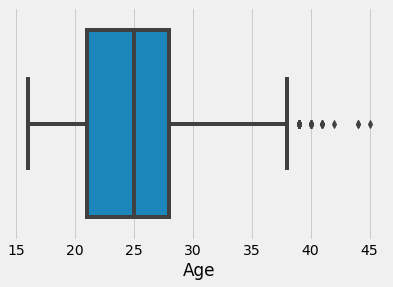

In [18]:
#Dectecing outliers in the data
outliersDetection = sns.boxplot(data["Age"])


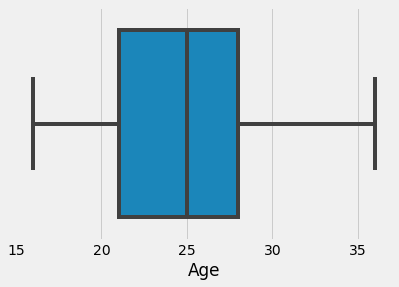

In [19]:
data = data[data["Age"]<37]
outliersDetection = sns.boxplot(data["Age"])


# Feature Engineering


In [20]:
# creating new features by aggregating the features

def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [21]:
# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

# lets check the column names in the data after adding new features
data.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKRe

In [22]:
def extract_value_from(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in column:
        out = float(out.replace('K', ''))*1000
    return float(out)
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))
data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data["Release Clause"]=data["Release Clause"].apply(lambda x: extract_value_from(x))
def extract_value_from(value):
    out = value.replace('lbs', '')
    return float(out)
data['Weight'] = data['Weight'].apply(lambda x : extract_value_from(x))


In [23]:
List1=['LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB']
for  i in List1:
    data[i]=data[i].astype(str)
    for j in data.index:
        data[i][j]=data[i][j].split("+")[0]


In [24]:
for i in List1:
    data[i]=data[i].astype(float)

In [25]:
data["Jersey Number"]=data["Jersey Number"].replace('NA',"0")
p=[]
for i in data.index:
    try:
        data["Contract Valid Until"]=float(data["Contract Valid Until"][i])
        data["Jersey Number"]=float(data["Jersey Number"][i])
    except:
        p.append(i)
            
    
        
     

In [26]:
for i in data.index:
    if type(data['Height'][i])==str:
        data['Height'][i]=int(data["Height"][i].split("'")[-1])*0.083+int(data["Height"][i].split("'")[0])
    else:
        print(i)

In [27]:
data["Height"]=data["Height"].astype(float)

In [28]:
cols=[]
for i in data.columns:
    if data[i].dtypes==object:
        cols.append(i)


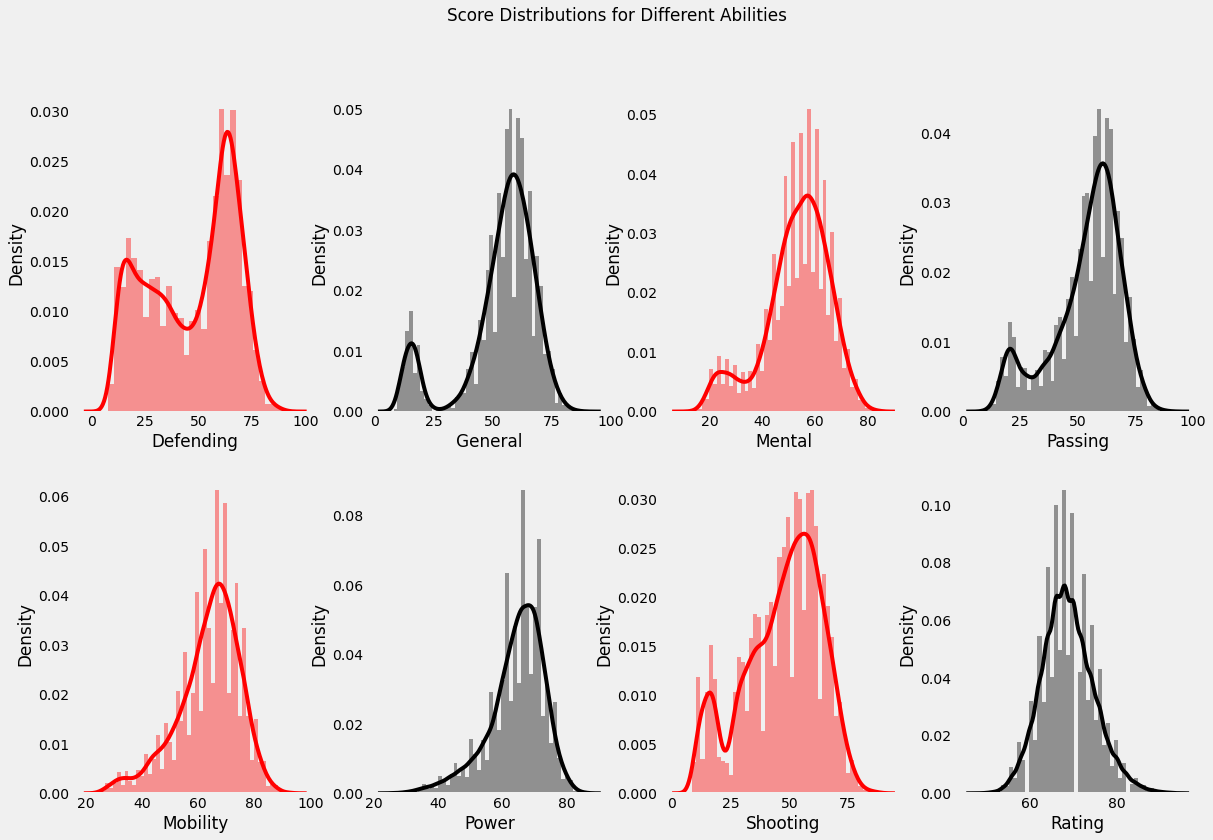

In [29]:
# lets check the Distribution of Scores of Different Skills

plt.rcParams['figure.figsize'] = (18, 12)
plt.subplot(2, 4, 1)
sns.distplot(data['Defending'], color = 'red')
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['General'], color = 'black')
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['Mental'], color = 'red')
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['Passing'], color = 'black')
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['Mobility'], color = 'red')
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['Power'], color = 'black')
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['Shooting'], color = 'red')
plt.grid()

plt.subplot(2, 4, 8)
sns.distplot(data['Rating'], color = 'black')
plt.grid()

plt.suptitle('Score Distributions for Different Abilities')
plt.show()

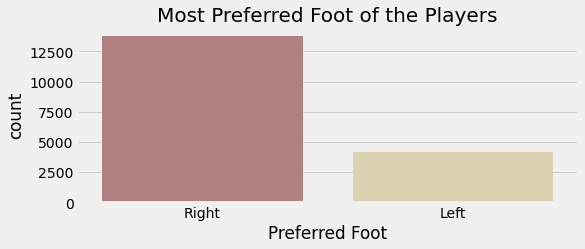

In [30]:
# comparison of preferred foot over the different players

plt.rcParams['figure.figsize'] = (8, 3)
sns.countplot(data['Preferred Foot'], palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

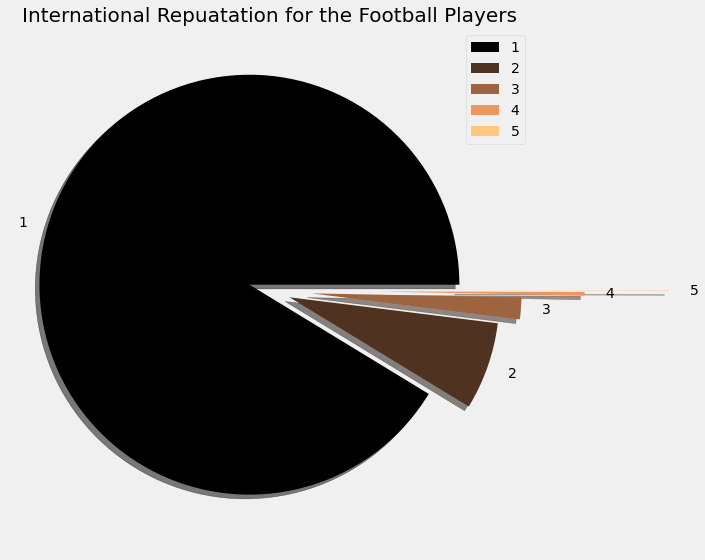

In [31]:
# plotting a pie chart to represent share of international repuatation

labels = ['1', '2', '3', '4', '5']  #data['International Reputation'].index
sizes = data['International Reputation'].value_counts()
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1, 0.2, 0.5, 0.9]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True,)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

In [32]:
#**Let's check the Players with International Reputation as 5**

data[data['International Reputation'] == 5][['Name','Nationality',
                            'Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'magma')

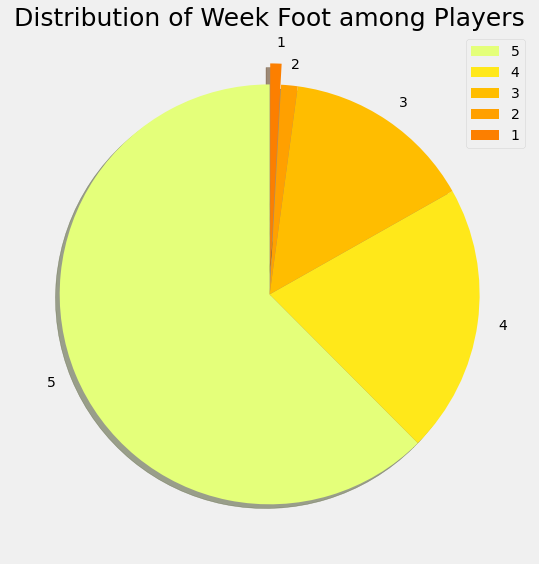

In [33]:
# plotting a pie chart to represent the share of week foot players

labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Week Foot among Players', fontsize = 25)
plt.legend()
plt.show()

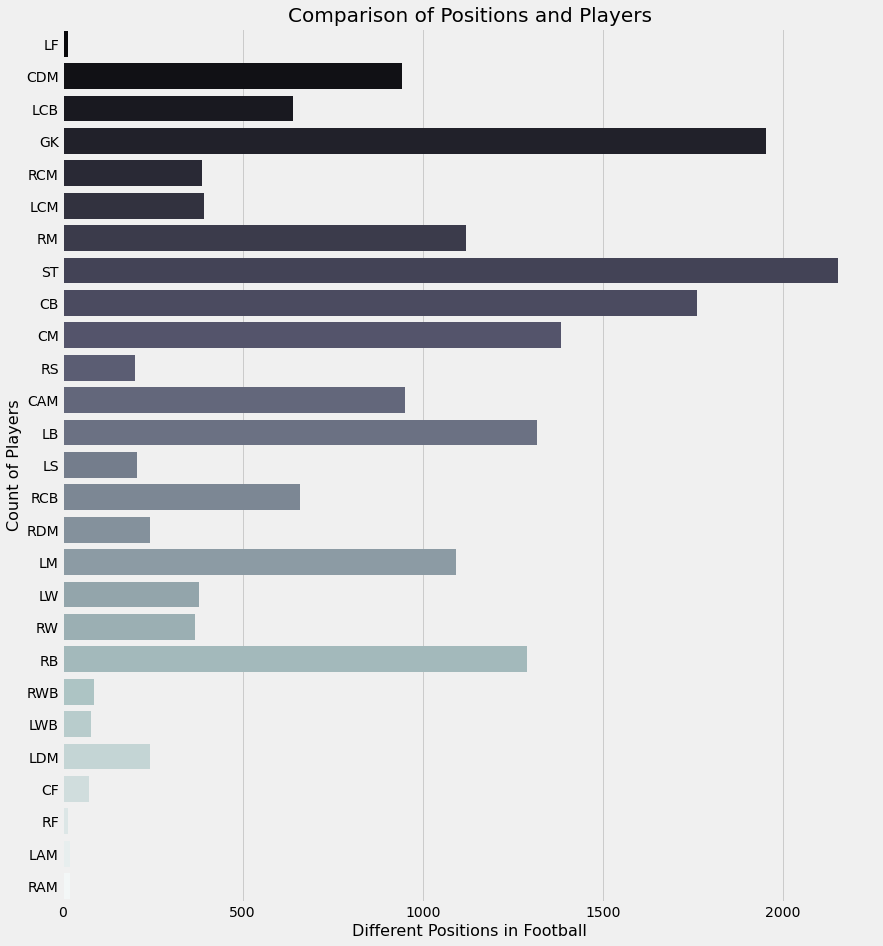

In [34]:
# different positions acquired by the players 

plt.figure(figsize = (13, 15))
plt.style.use('fivethirtyeight')
ax = sns.countplot(y = 'Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

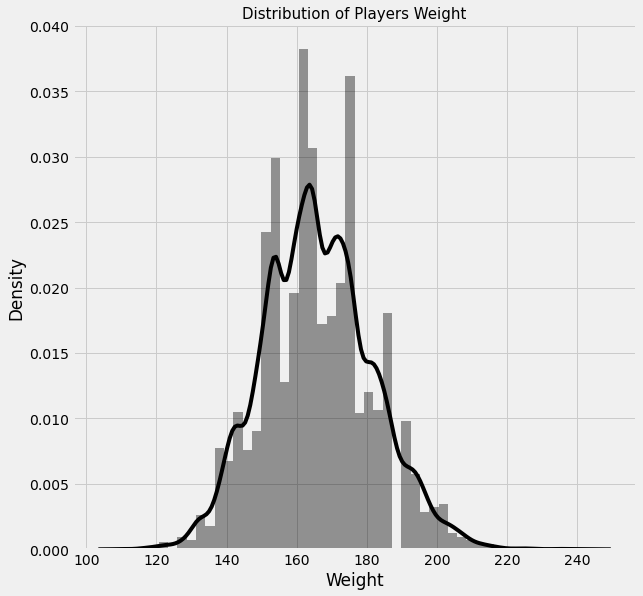

In [35]:


# plotting the distribution of weight of the players
sns.distplot(data['Weight'], color = 'black')
plt.title("Distribution of Players Weight", fontsize = 15)
plt.show()

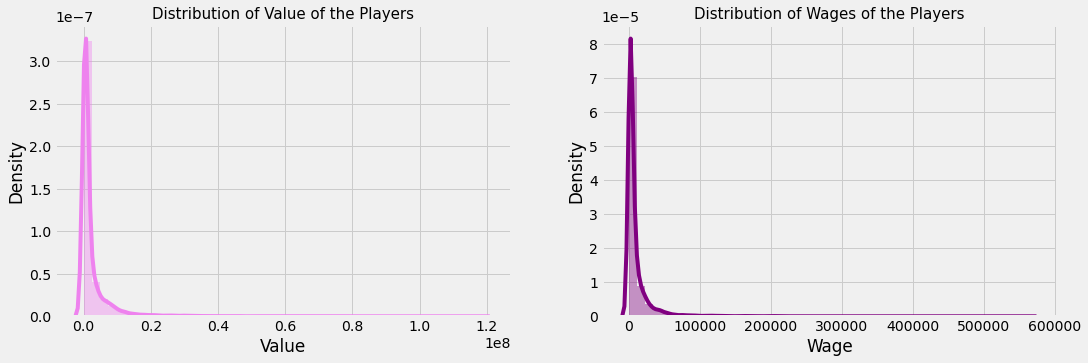

In [36]:
# visualizing the data
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Value'], color = 'violet')
plt.title('Distribution of Value of the Players', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(data['Wage'], color = 'purple')
plt.title('Distribution of Wages of the Players', fontsize = 15)
plt.show()

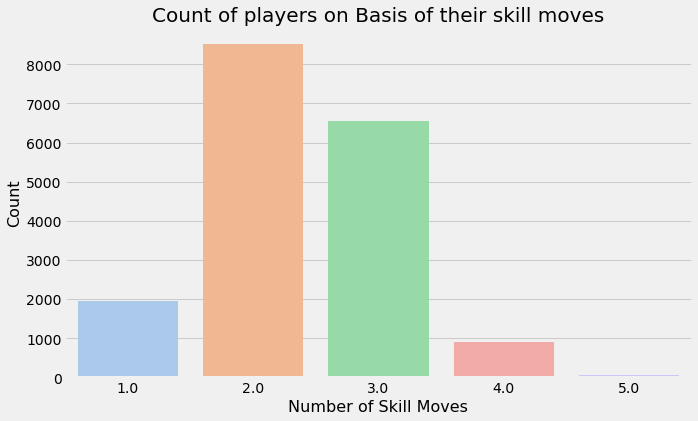

In [37]:
# Skill Moves of Players

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'pastel')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

In [38]:
data[(data['Skill Moves'] == 5.0) & (data['Age'] < 20)][['Name','Age']]

Name  Age
2495      M. Ødegaard   19
25          K. Mbappé   19
1004        J. Sancho   18
1143  Vinícius Júnior   17

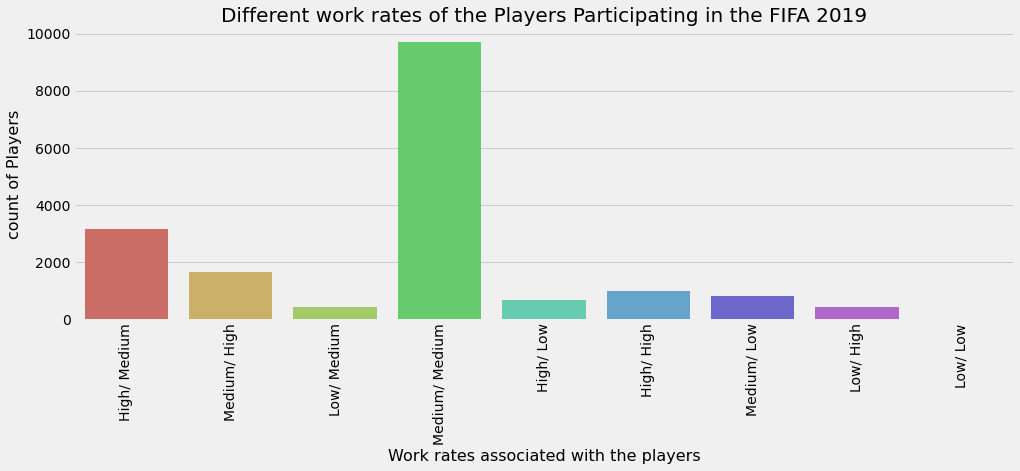

In [39]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 5))
plt.style.use('fivethirtyeight')

sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

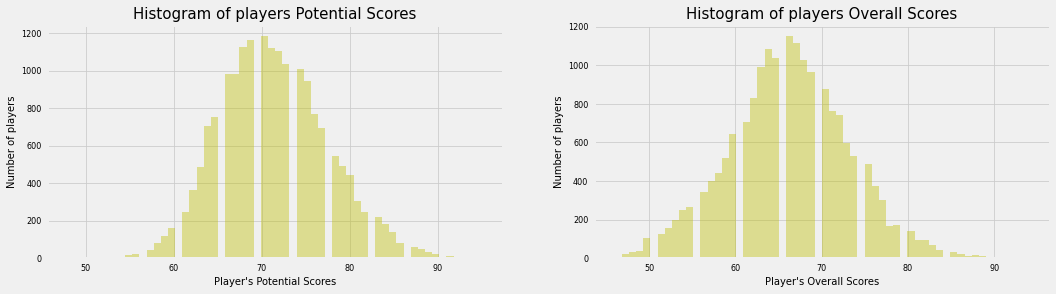

In [40]:
# To show Different potential scores of the players participating in the FIFA 2019

plt.figure(figsize=(16, 4))
plt.style.use('seaborn-paper')

plt.subplot(1, 2, 1)
x = data.Potential
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 15)

plt.subplot(1, 2, 2)
y = data.Overall
ax = sns.distplot(y, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 15)
plt.show()

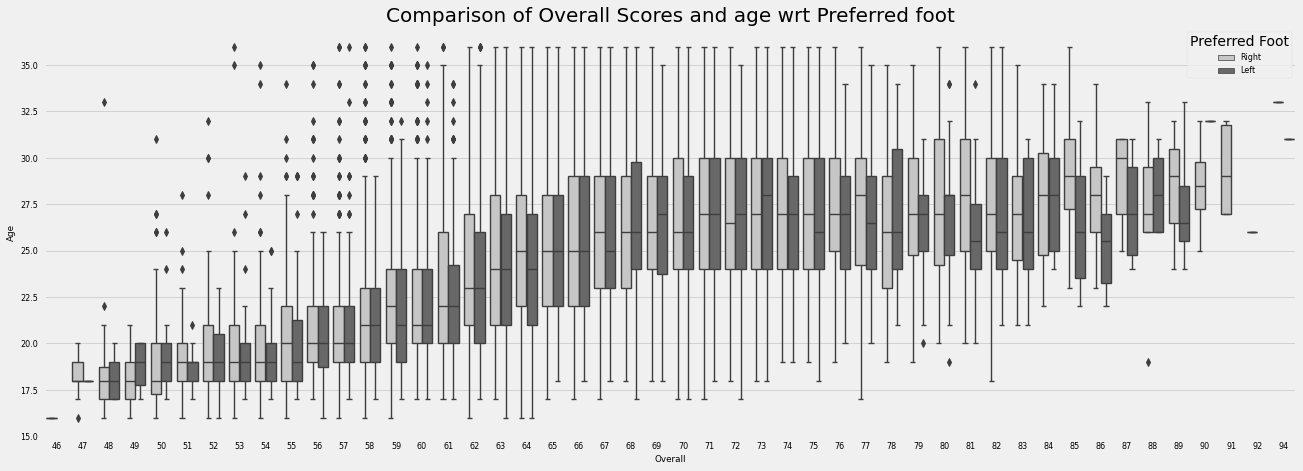

In [41]:
# violin plot 

plt.rcParams['figure.figsize'] = (20, 7)
plt.style.use('seaborn-dark-palette')

sns.boxplot(data['Overall'], data['Age'], hue = data['Preferred Foot'], palette = 'Greys')
plt.title('Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)
plt.show()

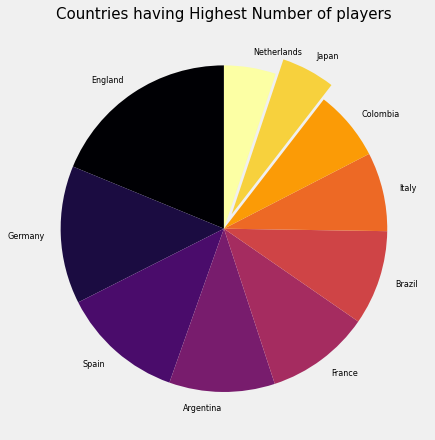

In [42]:
#**Countries with Most Players**
# picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(10).plot(kind = 'pie', cmap = 'inferno',
                                        startangle = 90, explode = [0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0])
plt.title('Countries having Highest Number of players', fontsize = 15)
plt.axis('off')
plt.show()

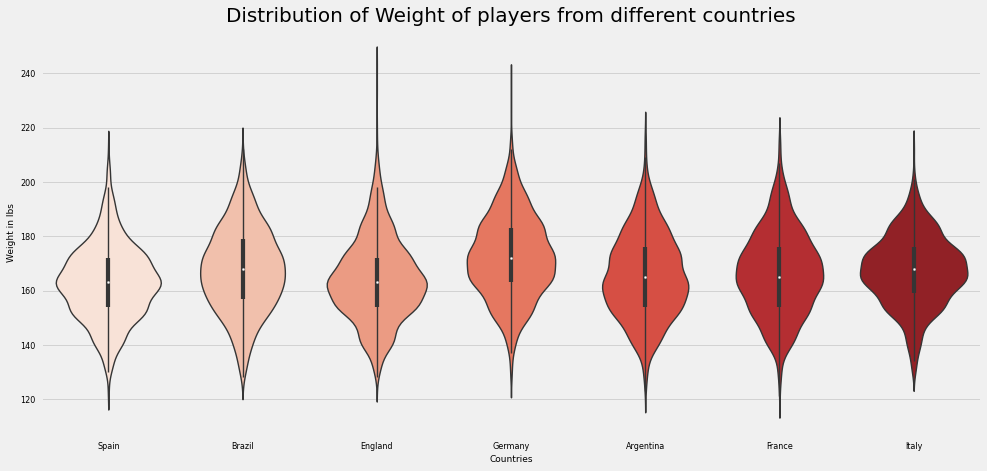

In [43]:
# Every Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Weight']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.violinplot(x = data_countries['Nationality'], y = data_countries['Weight'], palette = 'Reds')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Weight in lbs', fontsize = 9)
ax.set_title(label = 'Distribution of Weight of players from different countries', fontsize = 20)
plt.show()

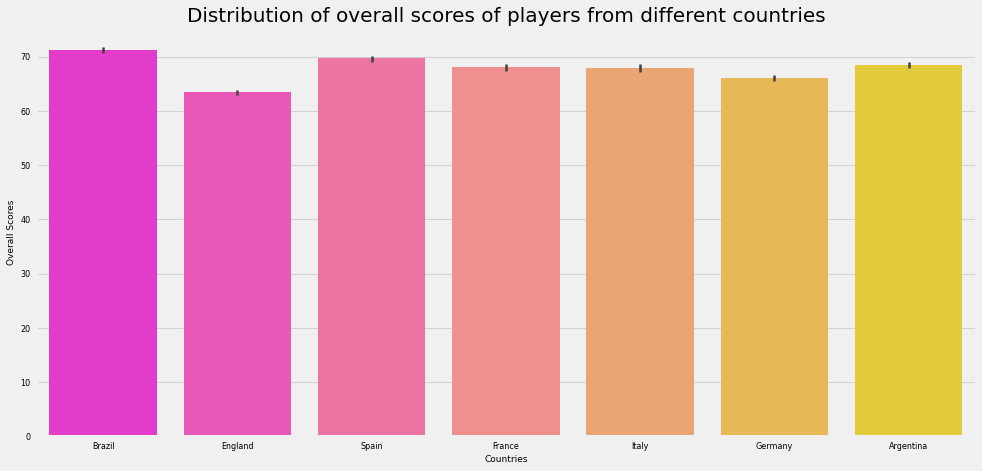

In [44]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

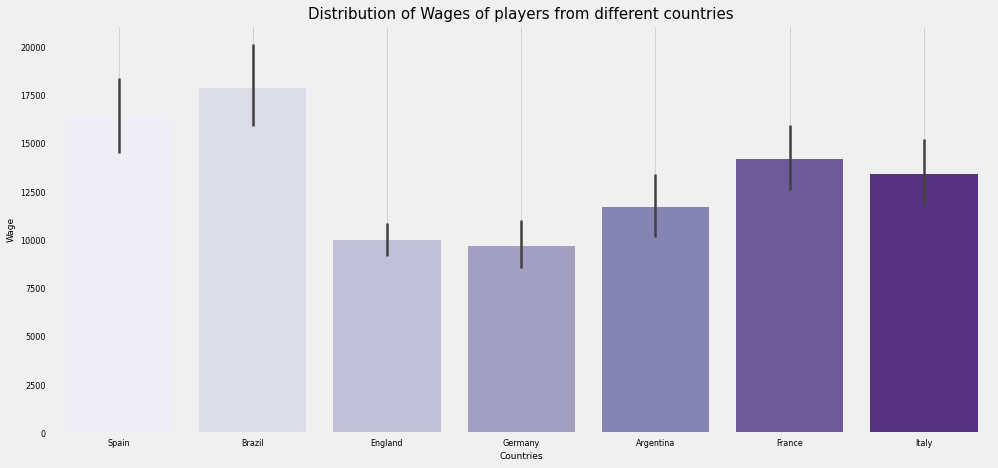

In [45]:
# Every Nations' Player and their wages

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'Purples')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.grid()
plt.show()

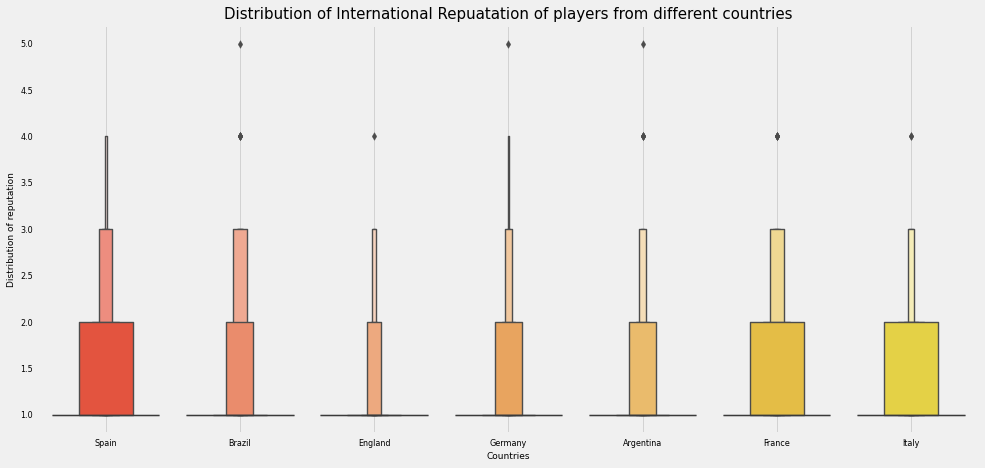

In [46]:
# Every Nations' Player and their International Reputation

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.grid()
plt.show()

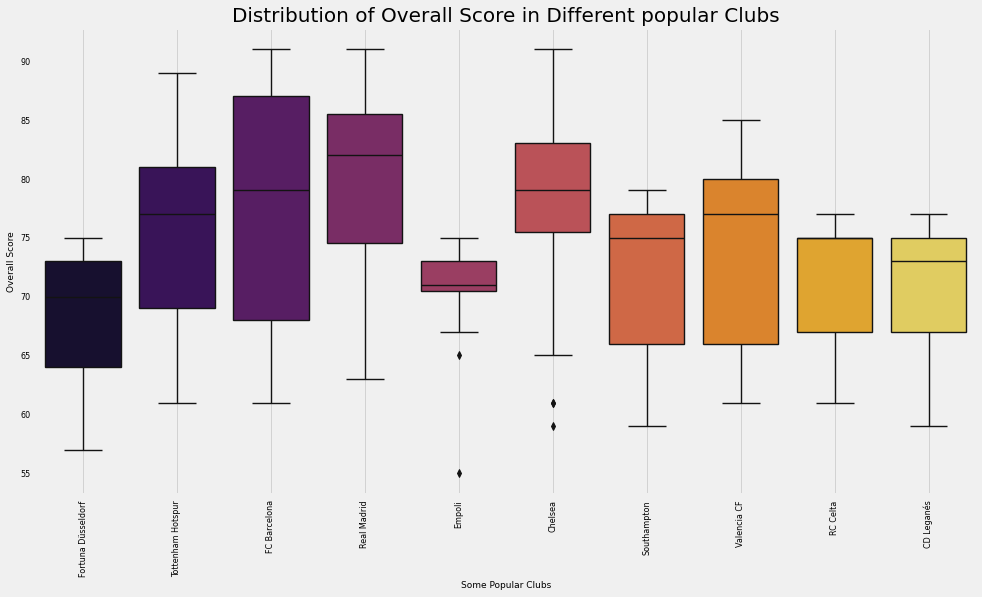

In [47]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

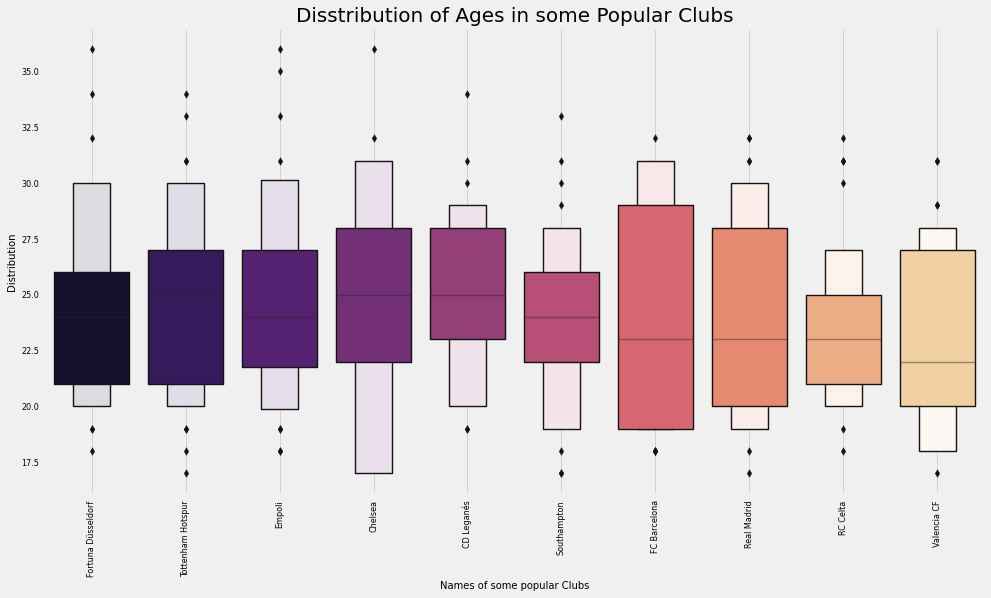

In [48]:
# Distribution of Ages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxenplot(x = 'Club', y = 'Age', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Ages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()


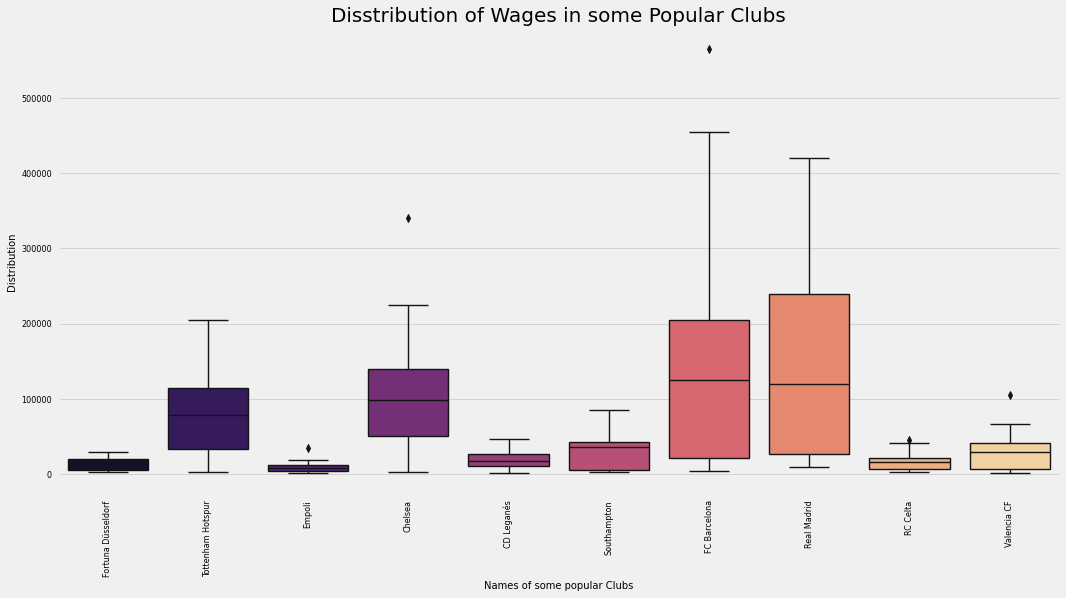

In [49]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

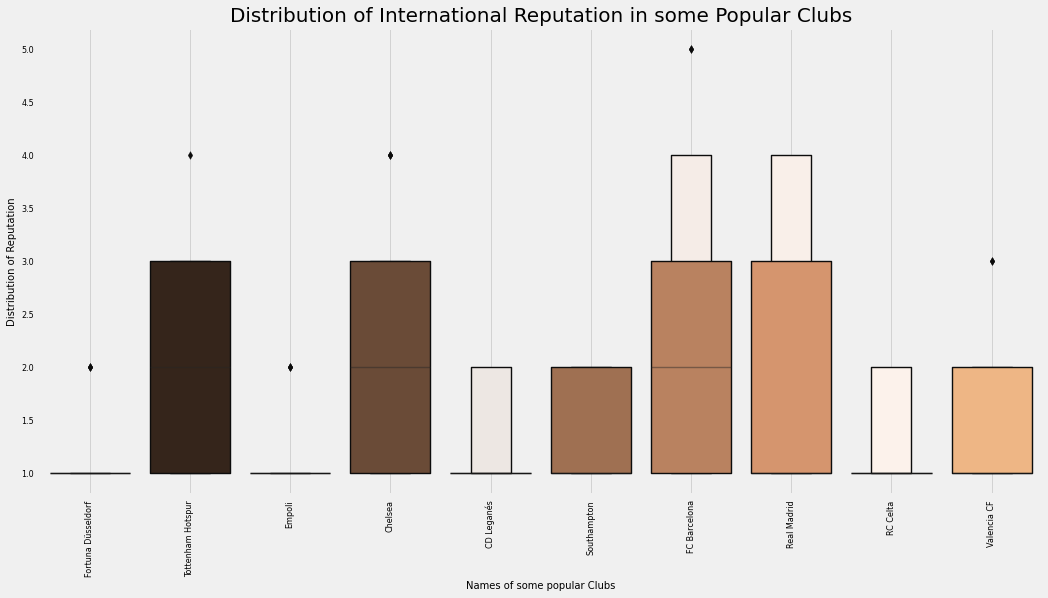

In [50]:
# Distribution of Wages in some Popular clubs

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxenplot(x = 'Club', y = 'International Reputation', data = data_club, palette = 'copper')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 10)
ax.set_title(label = 'Distribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

# Query Analysis

**Best Players per each position with their age, club, and nationality based on their Overall Scores**

In [51]:
# best players per each position with their age, club, and nationality based on their overall scores

data.iloc[data.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club',
                             'Nationality','Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'pink')

In [52]:
#**Best Players for each Skill**
## Let's Analyze the Skills of Players

@interact
def skill(skills = ['Defending', 'General', 'Mental', 'Passing', 
                       'Mobility', 'Power', 'Rating','Shooting'], score = 75):
    return data[data[skills] > score][['Name', 'Nationality', 'Club', 'Overall', skills]].sort_values(by = skills,
                                    ascending = False).head(20).style.background_gradient(cmap = 'Blues')

interactive(children=(Dropdown(description='skills', options=('Defending', 'General', 'Mental', 'Passing', 'Mo…

In [53]:
# finding 5 youngest Players from the dataset

youngest = data[data['Age'] == 16][['Name', 'Age', 'Club', 'Nationality', 'Overall']]
youngest.sort_values(by = 'Overall', ascending = False).head().style.background_gradient(cmap = 'magma')

In [54]:
# finding 15 eldest players from the dataset

data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club',
                              'Nationality', 'Overall']].head(15).style.background_gradient(cmap = 'Wistia')

**Defining the features of players**

In [55]:
# defining the features of players

player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

# Top four features for every position in football

for i, val in data.groupby(data['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Balance, Accel

In [56]:
# Top 10 left footed footballers

data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club',
         'Nationality', 'Overall']].sort_values(by = 'Overall',
            ascending = False).head(10).style.background_gradient(cmap = 'bone')

In [57]:
# Top 10 Right footed footballers


data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club',
                    'Nationality', 'Overall']].sort_values(by = 'Overall',
                            ascending = False).head(10).style.background_gradient(cmap = 'copper')


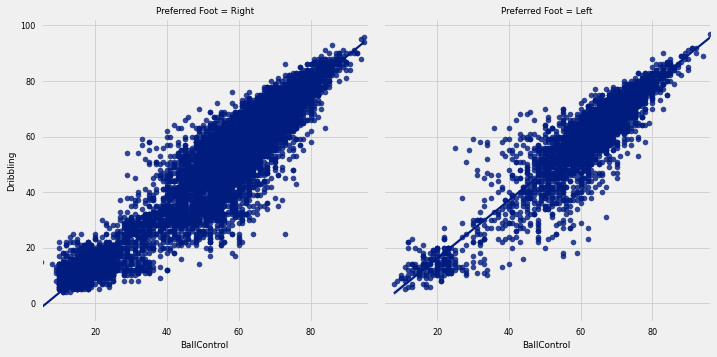

In [58]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()


# MACHING LEARNING


In [1]:
le = LabelEncoder()

data[cols] = data[cols].apply(LabelEncoder().fit_transform)


NameError: name 'LabelEncoder' is not defined

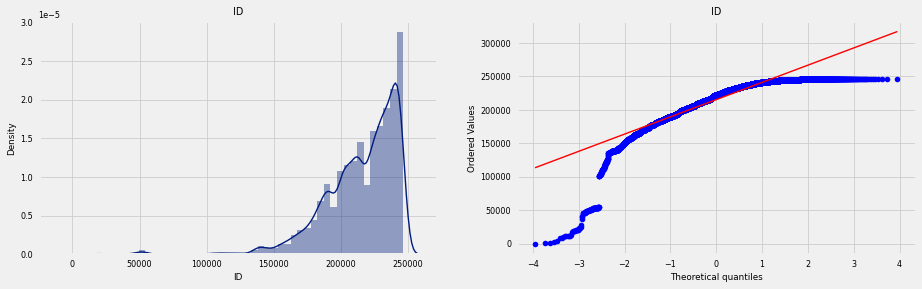

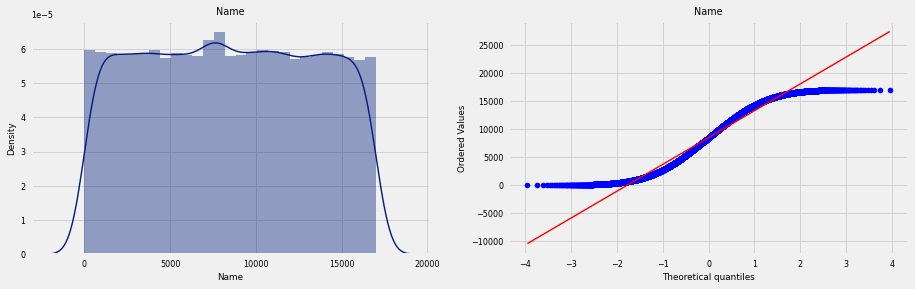

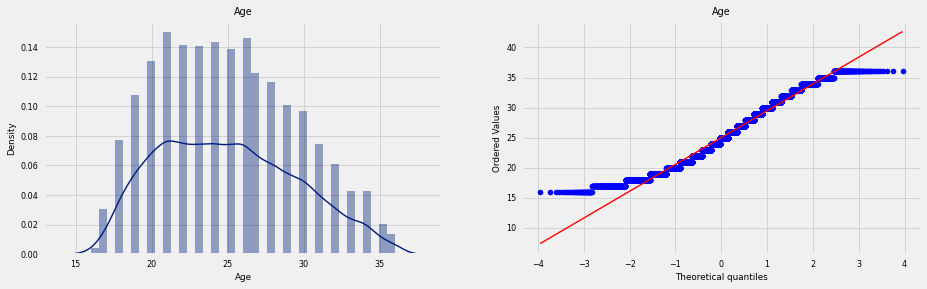

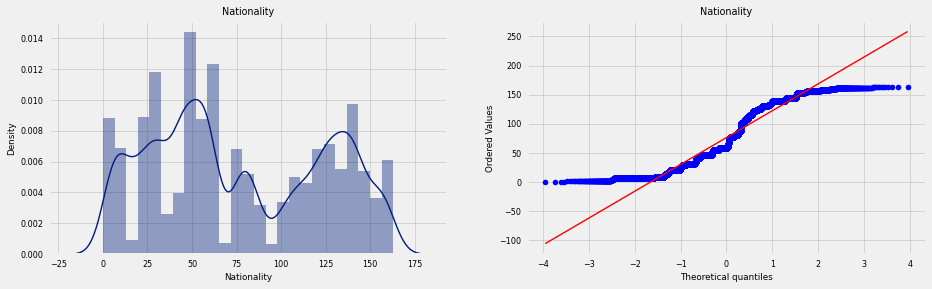

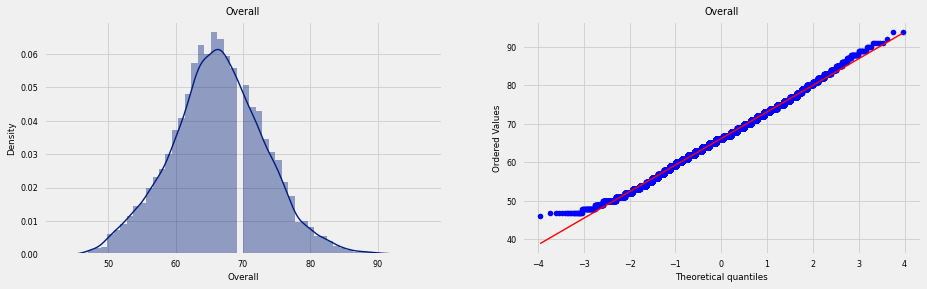

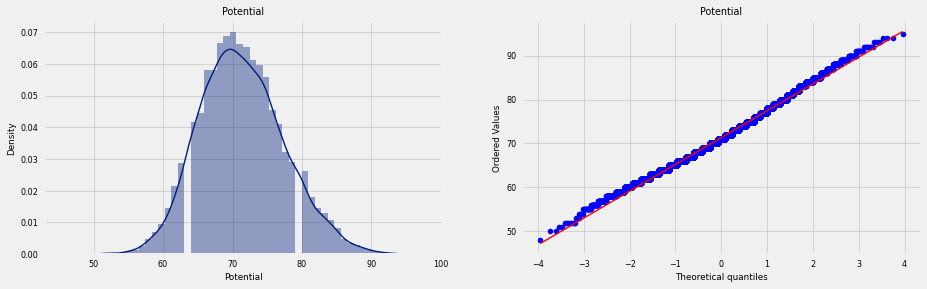

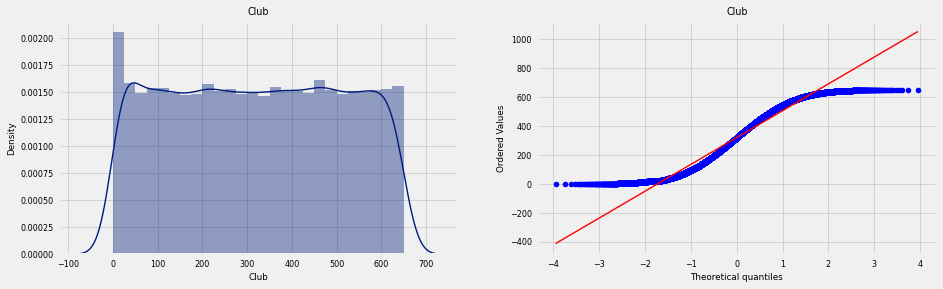

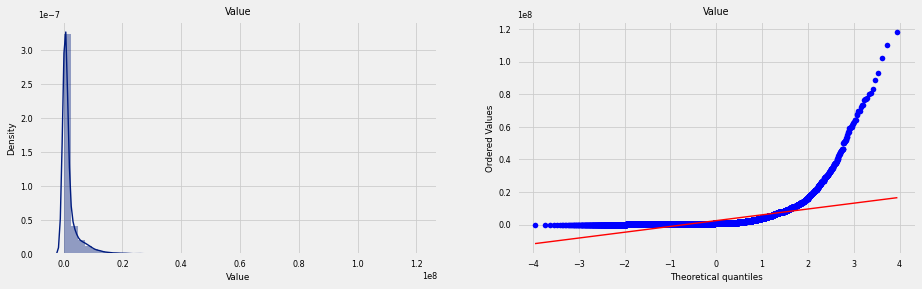

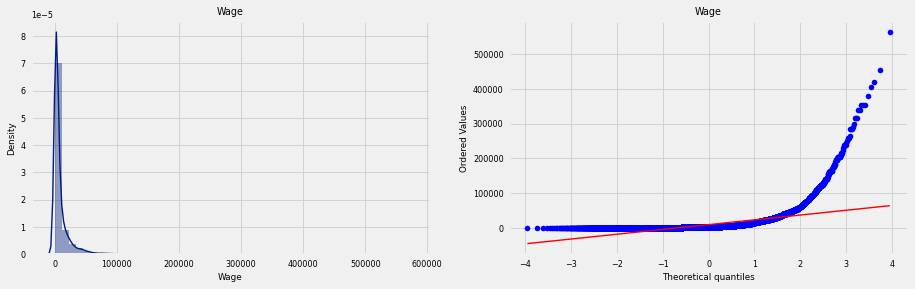

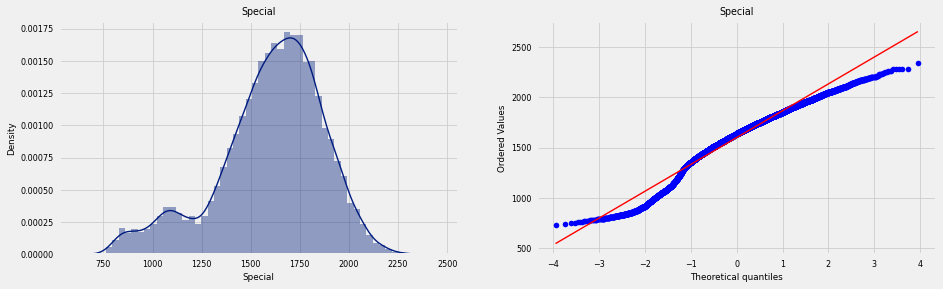

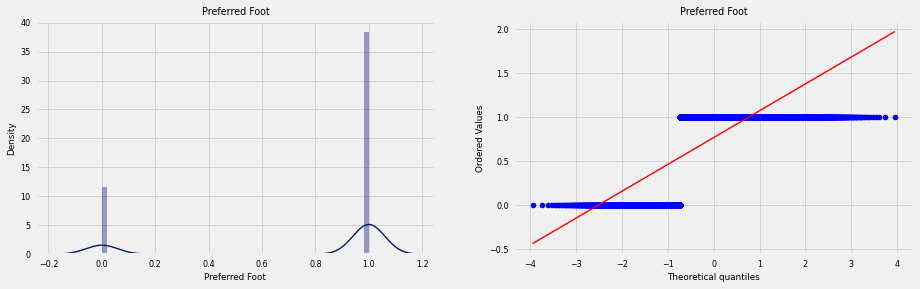

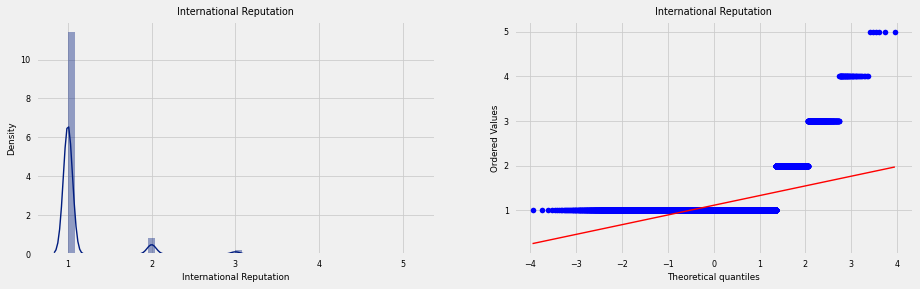

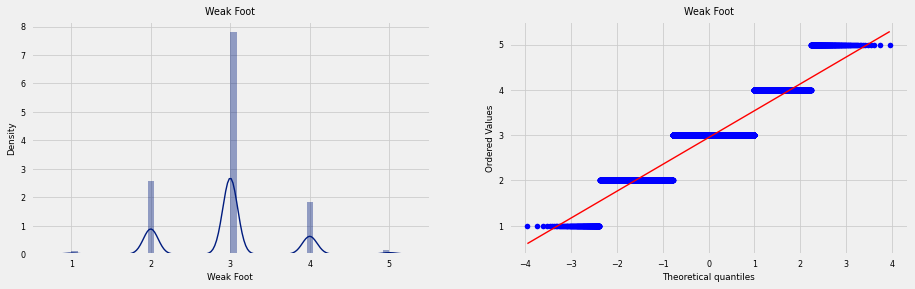

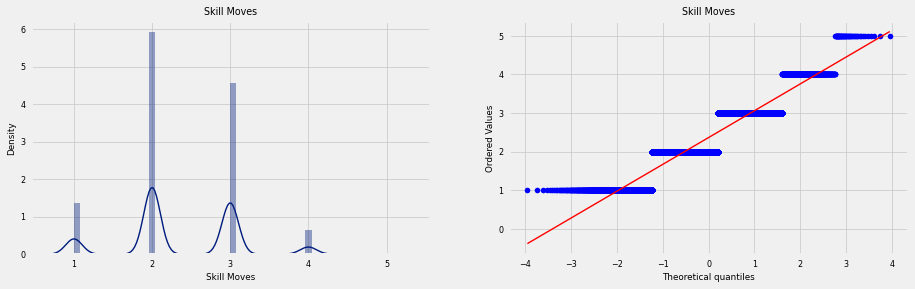

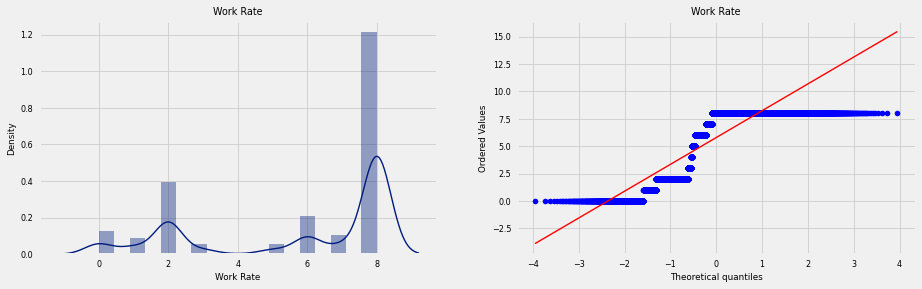

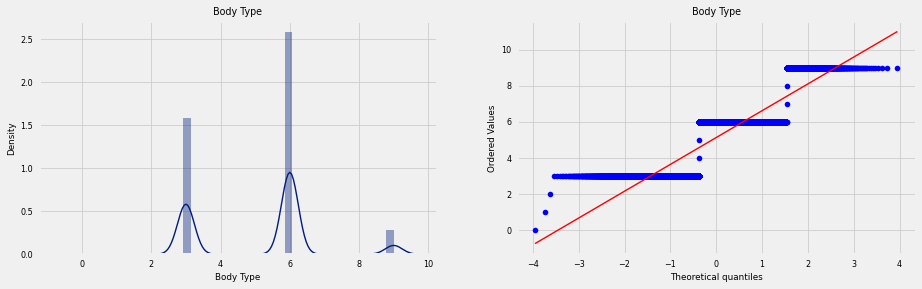

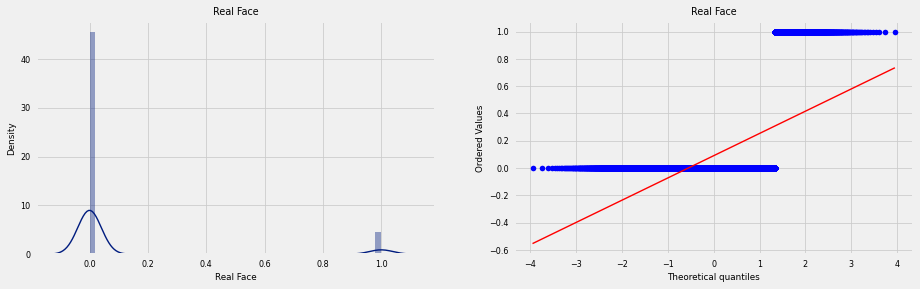

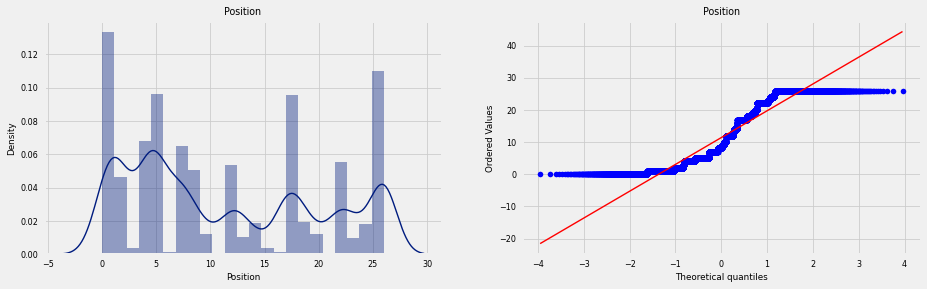

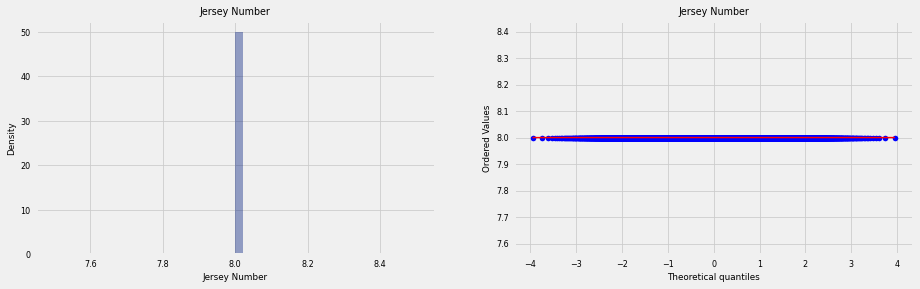

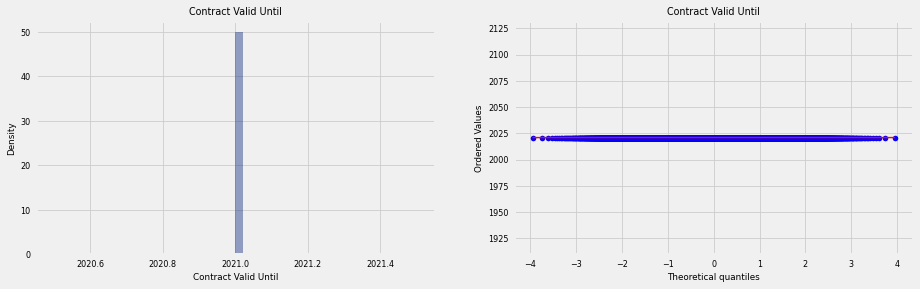

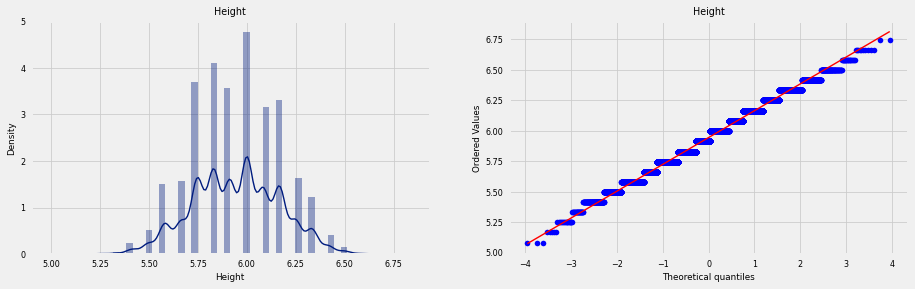

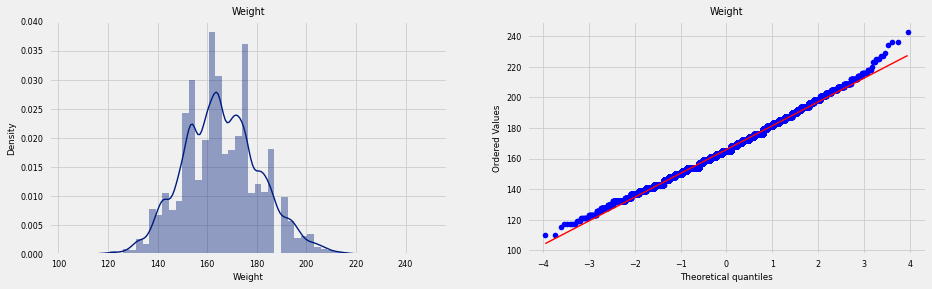

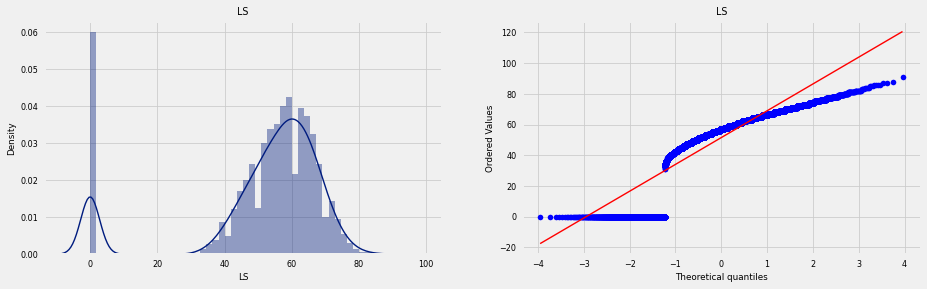

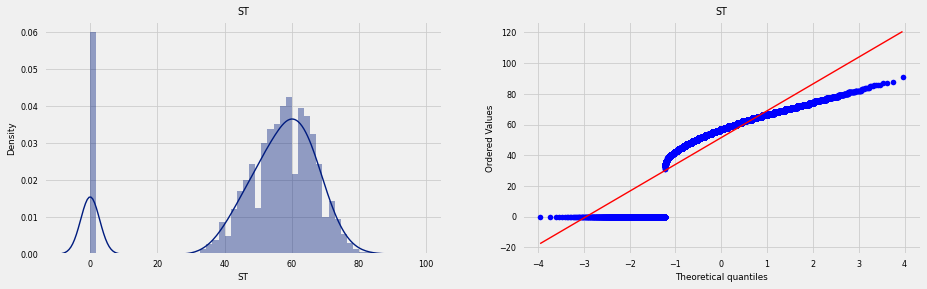

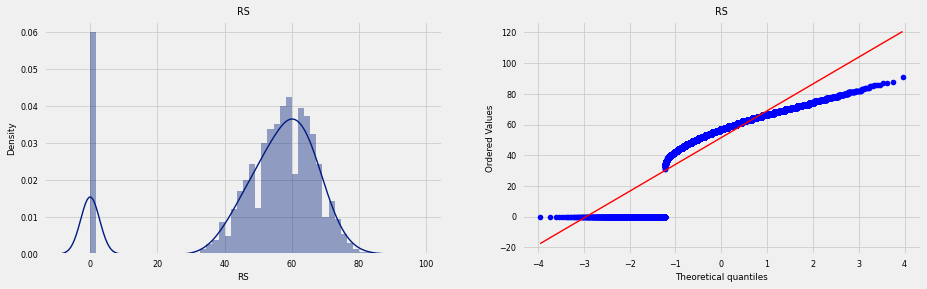

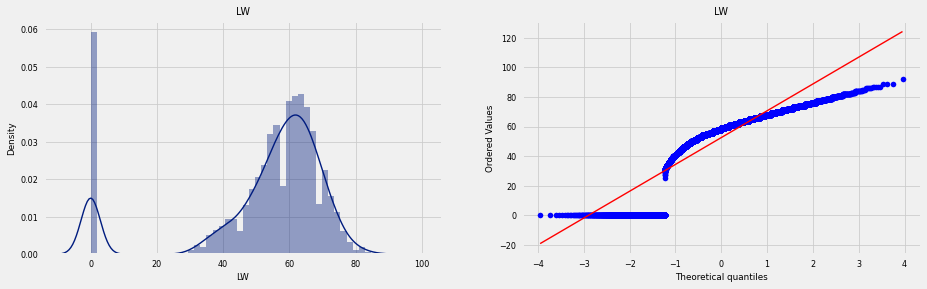

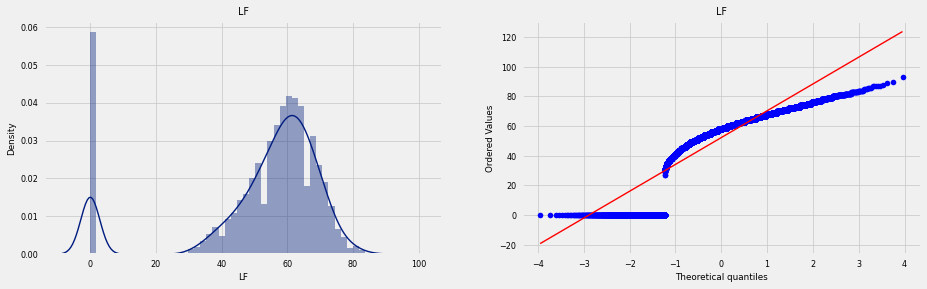

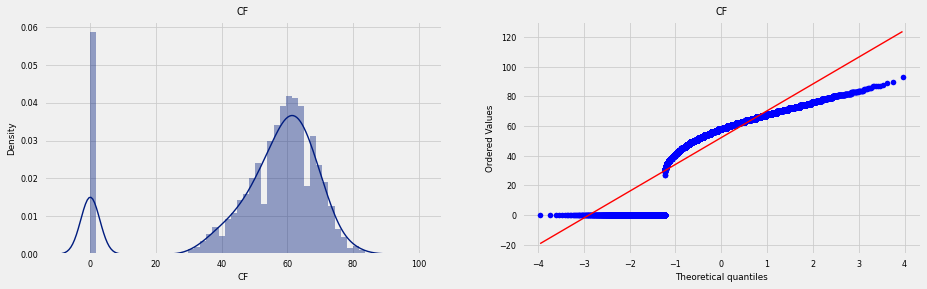

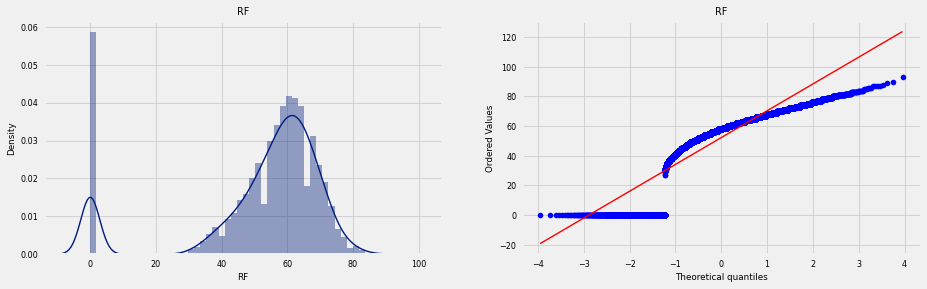

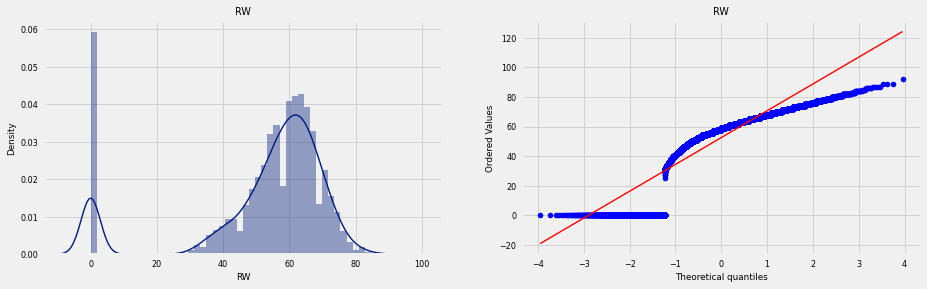

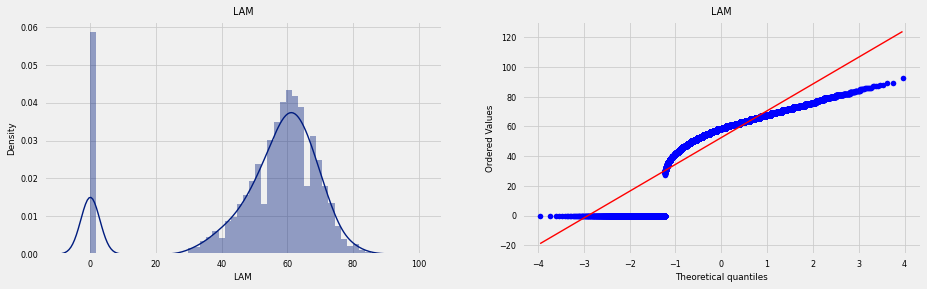

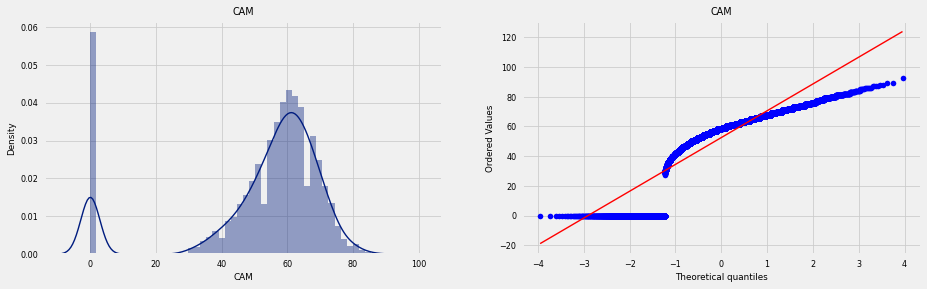

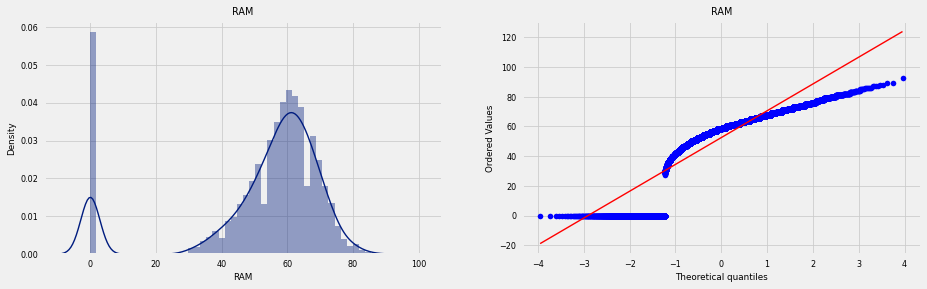

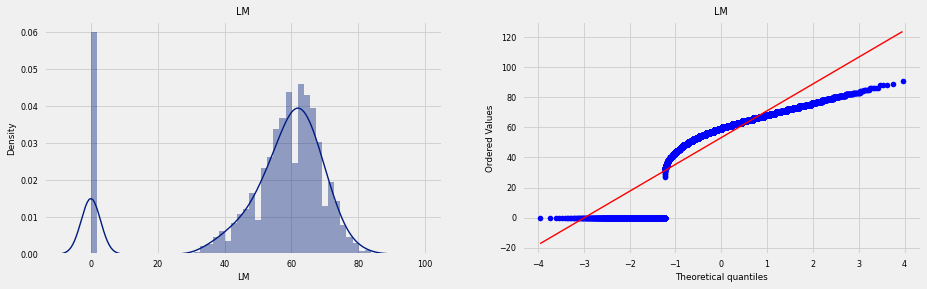

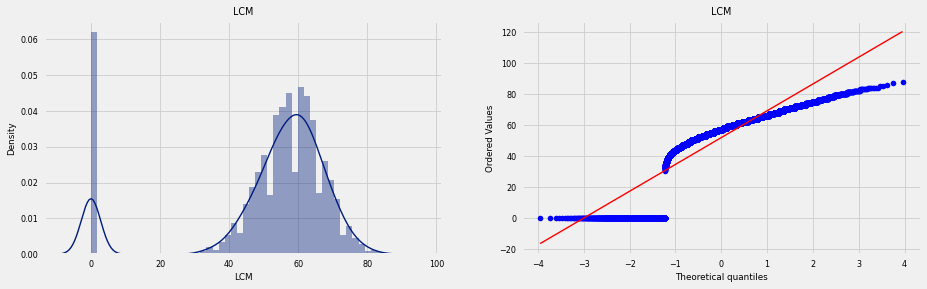

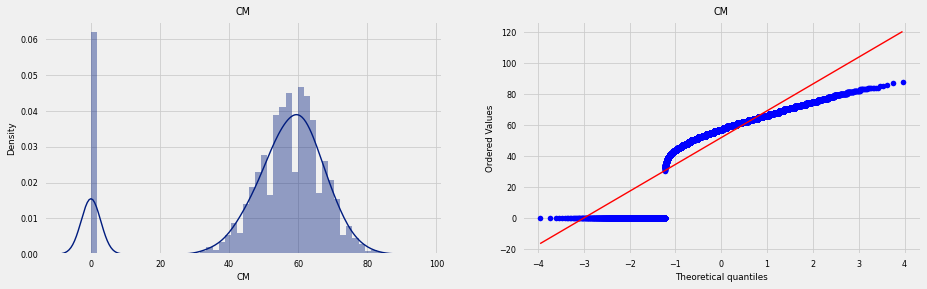

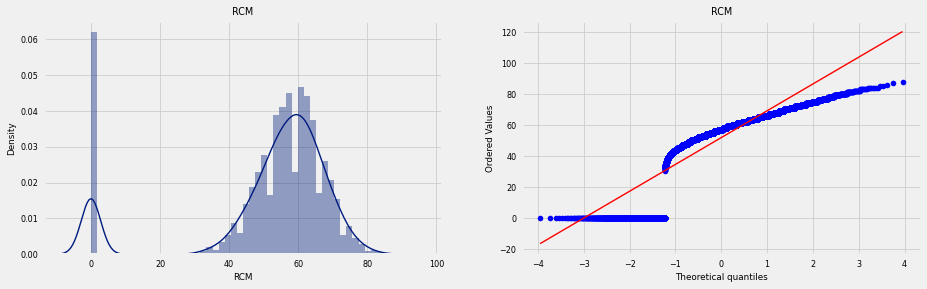

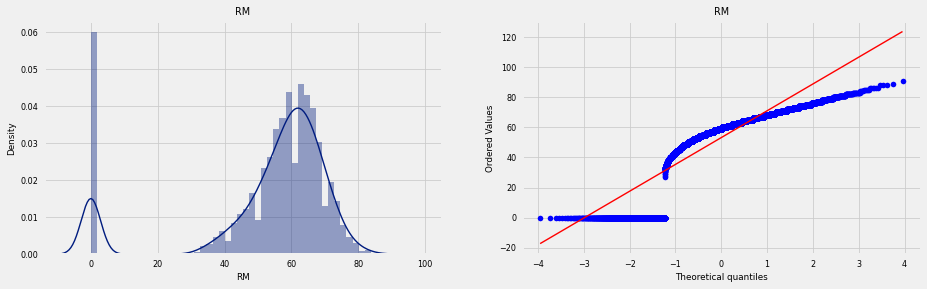

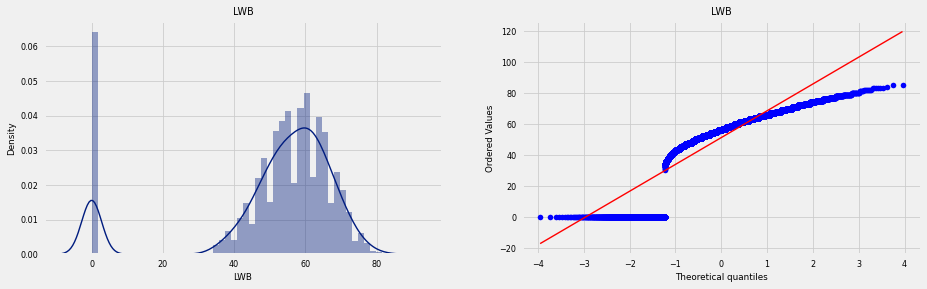

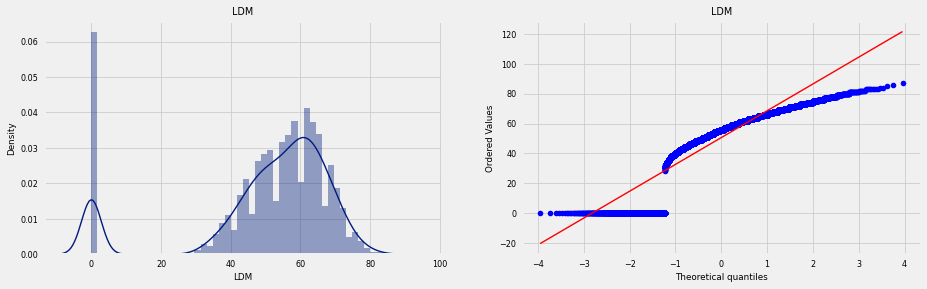

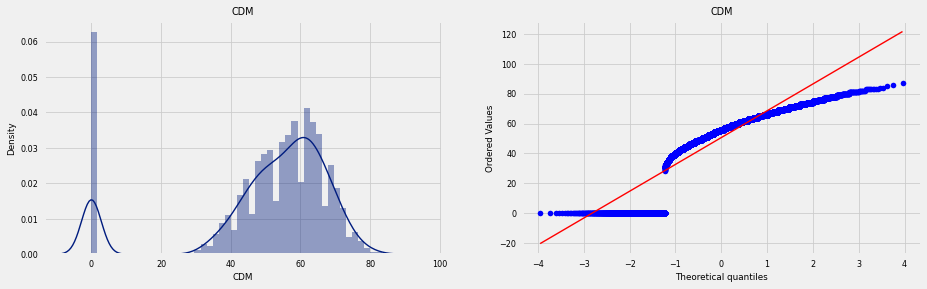

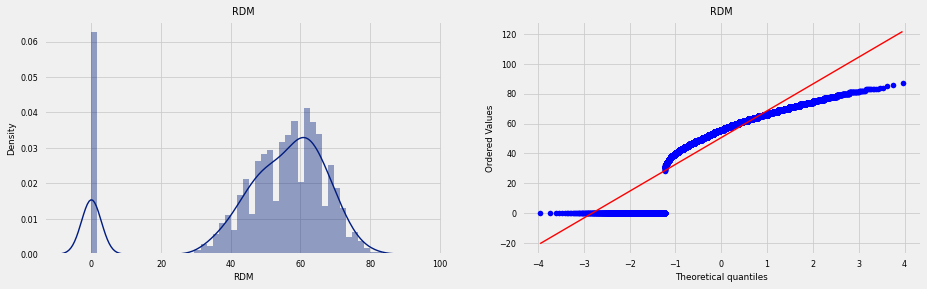

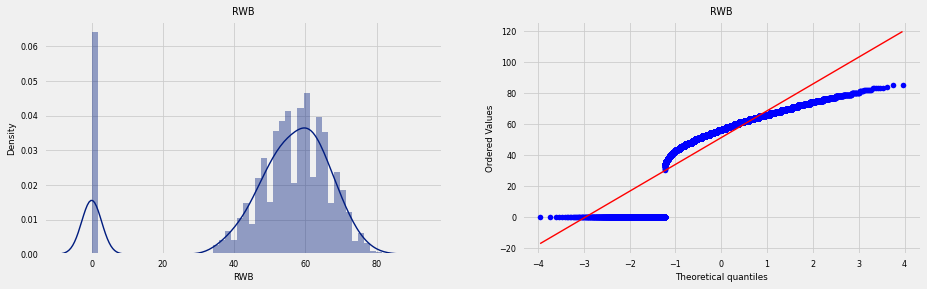

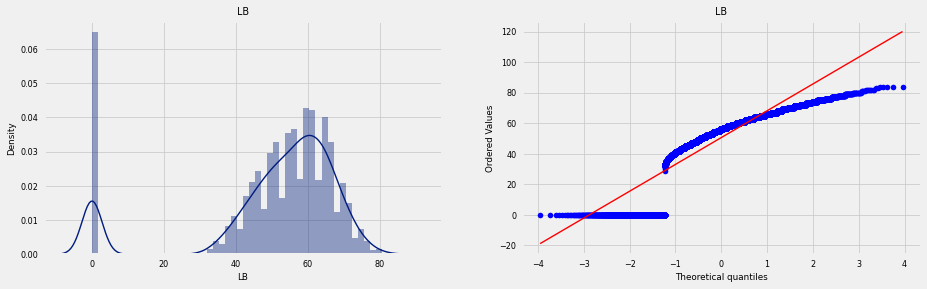

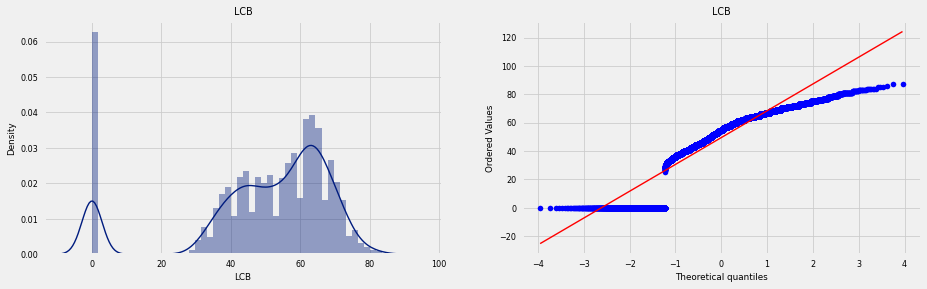

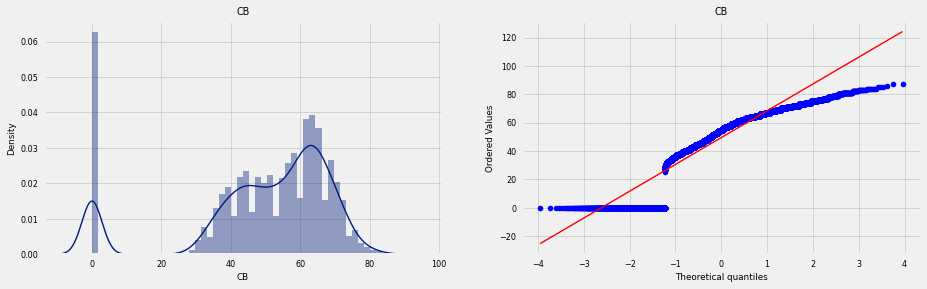

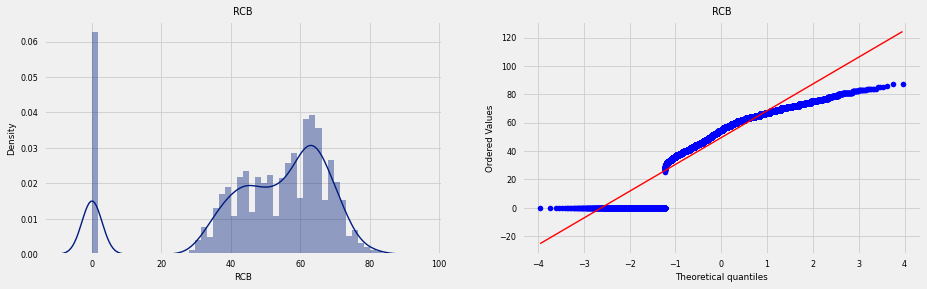

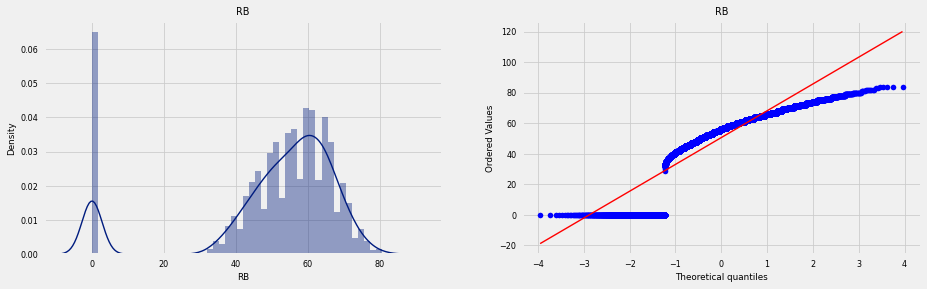

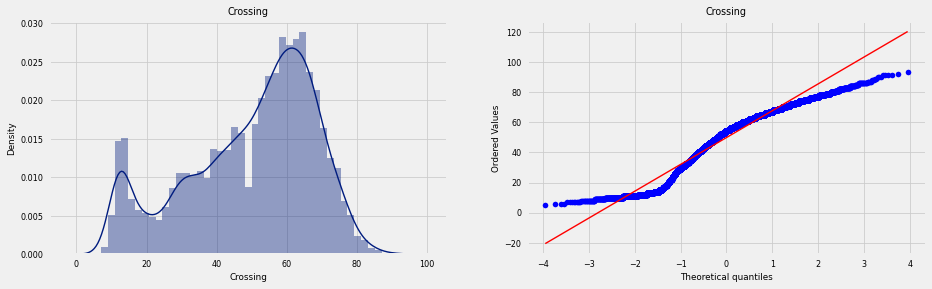

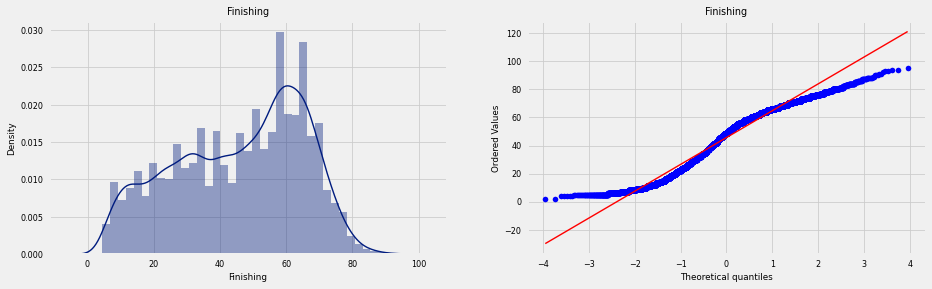

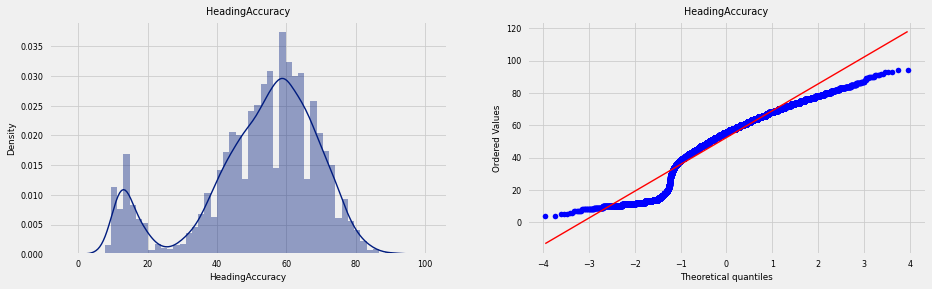

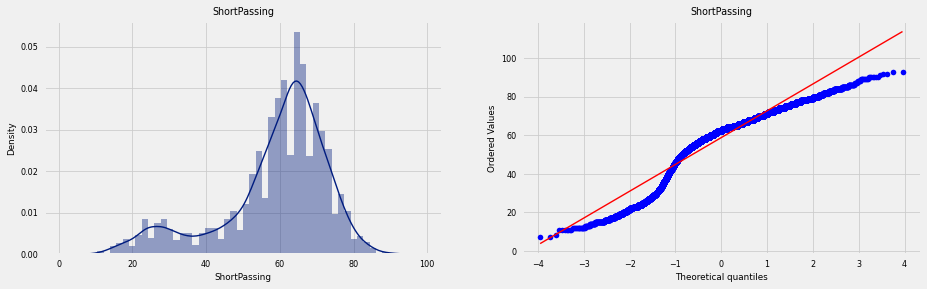

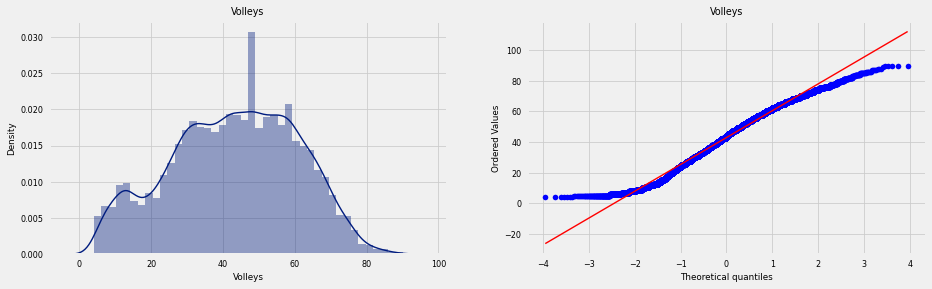

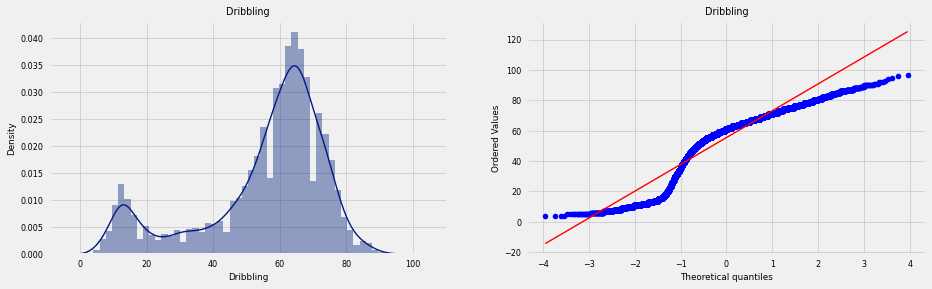

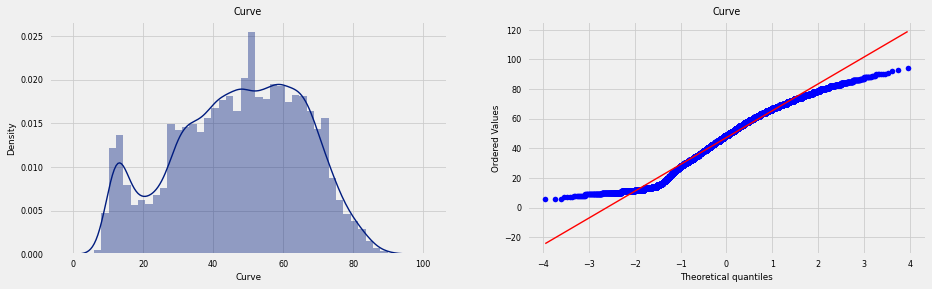

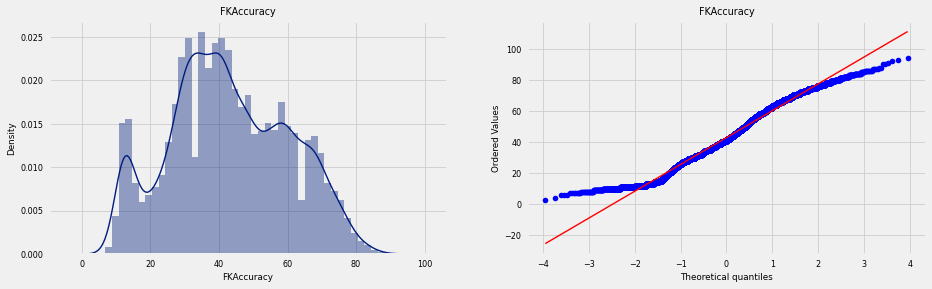

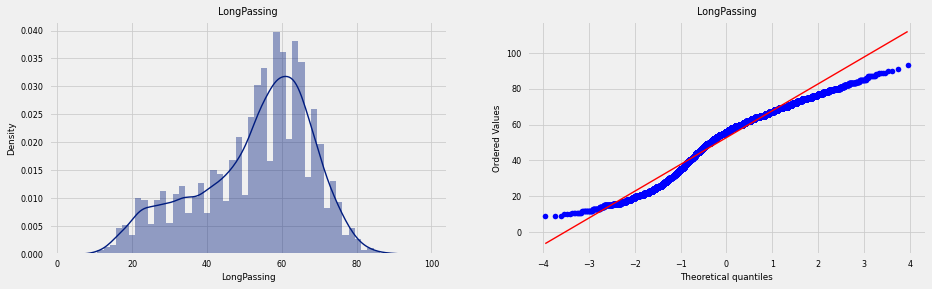

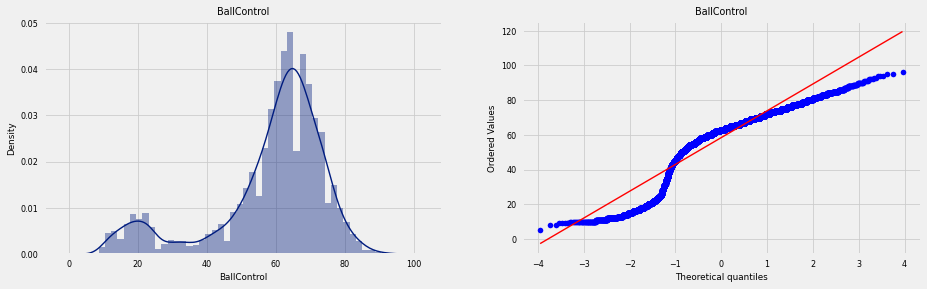

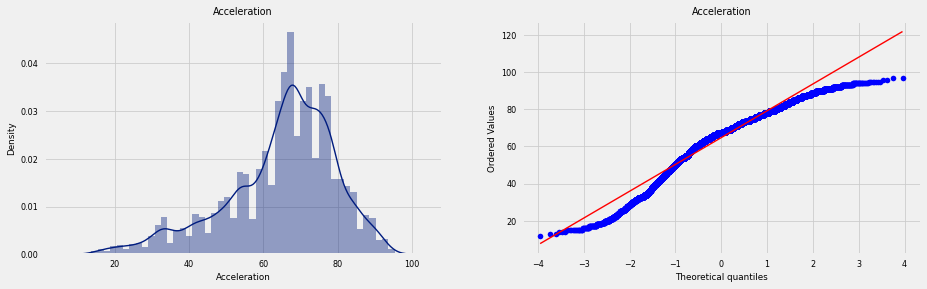

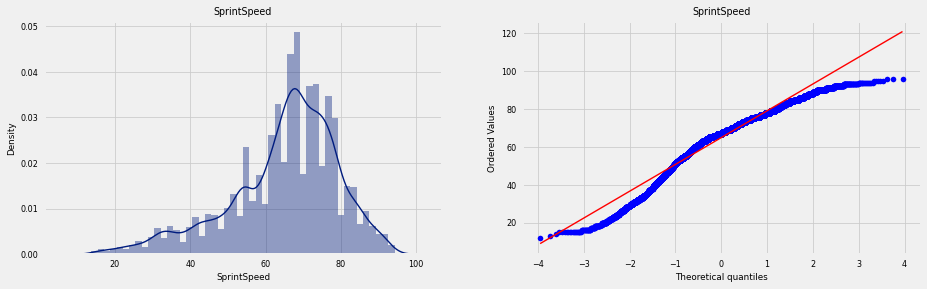

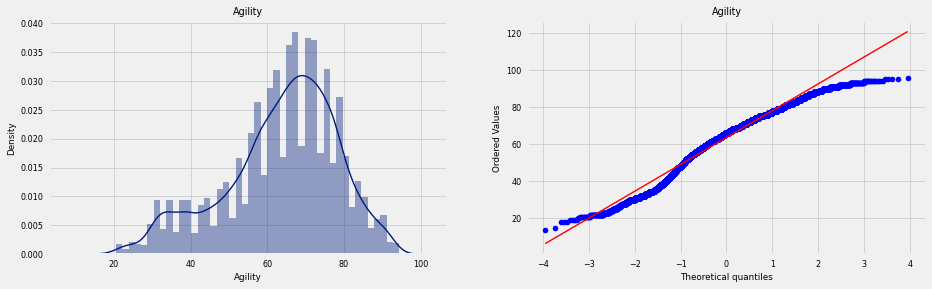

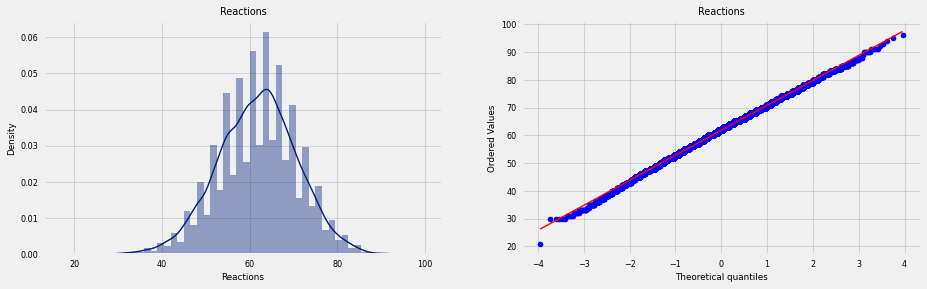

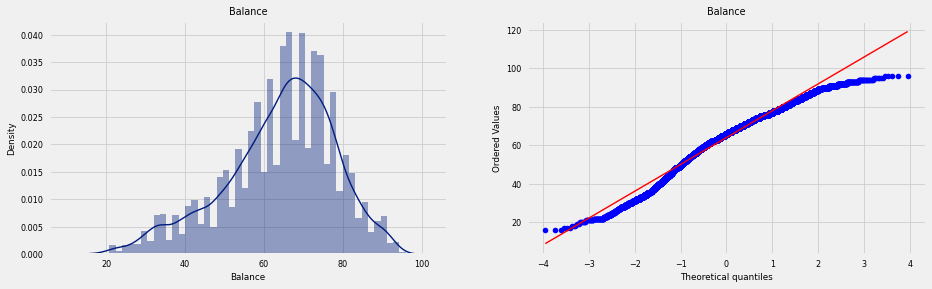

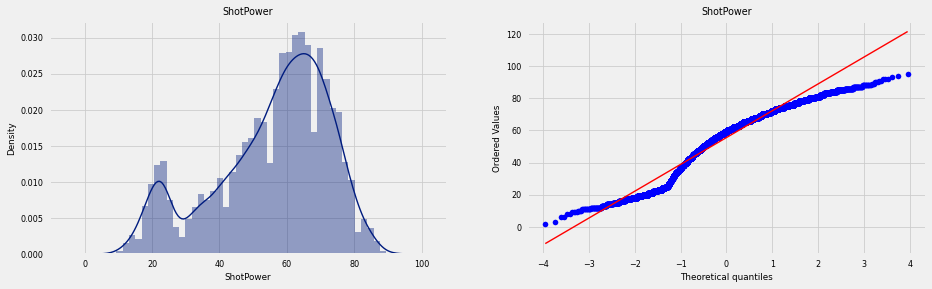

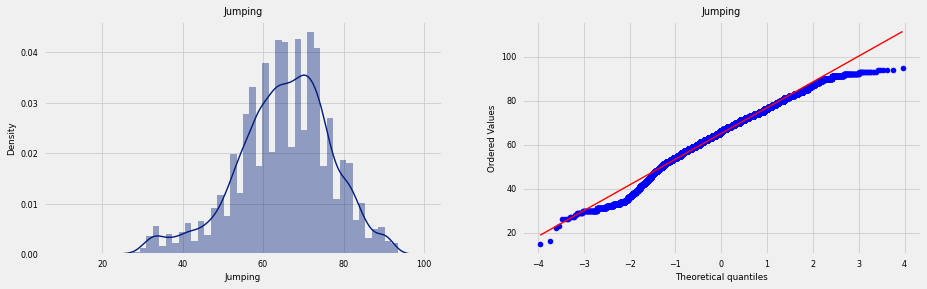

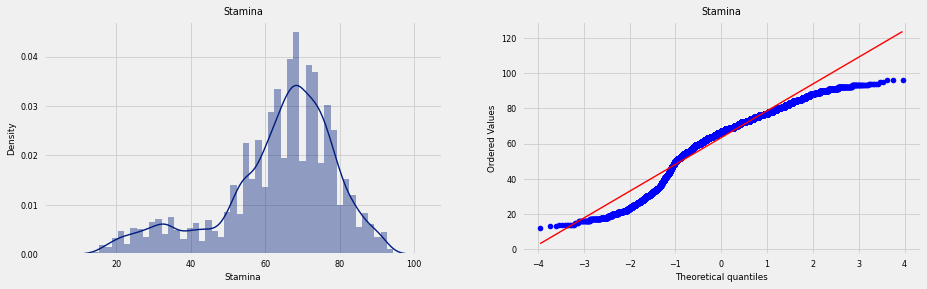

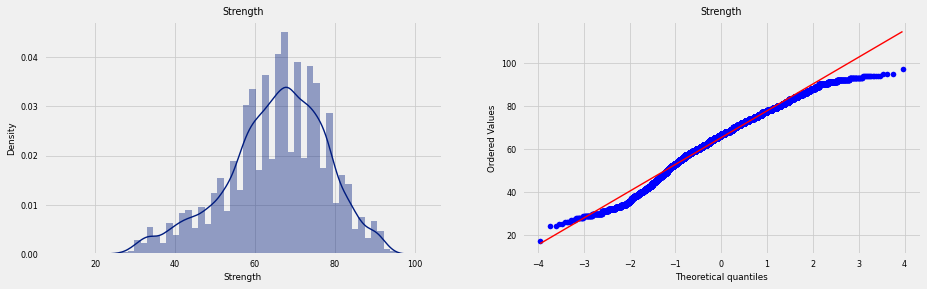

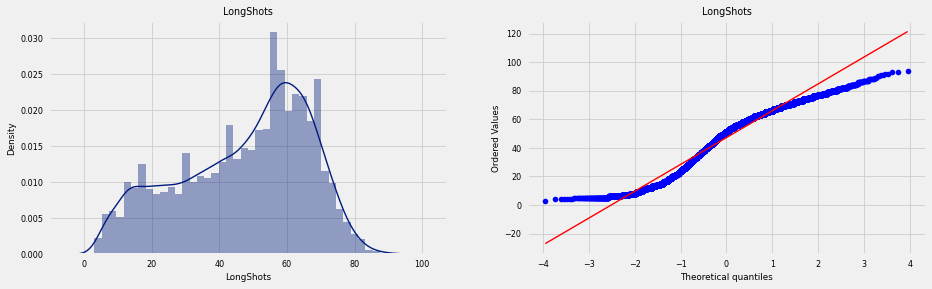

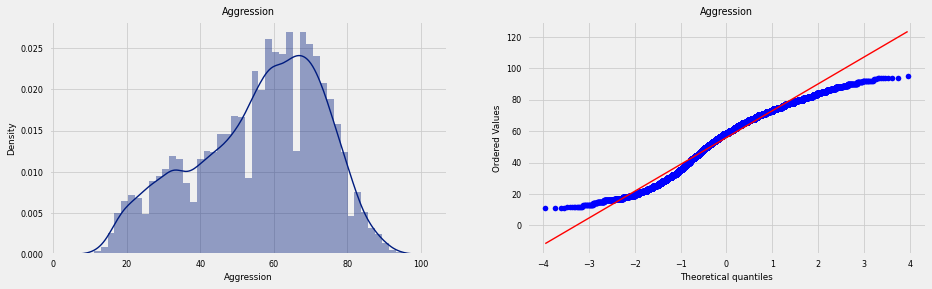

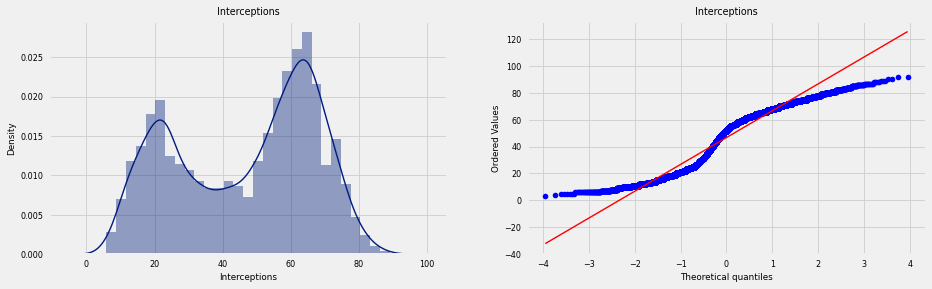

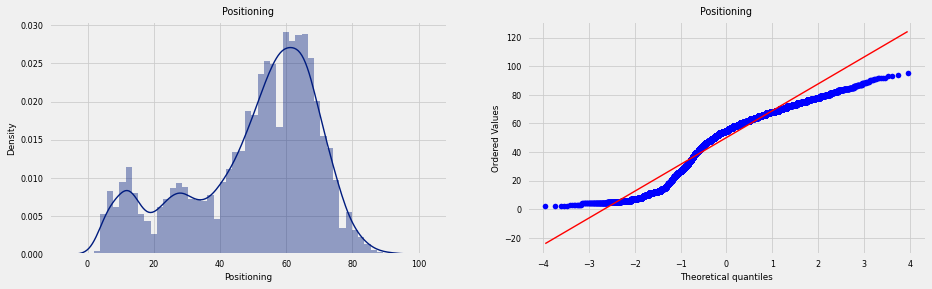

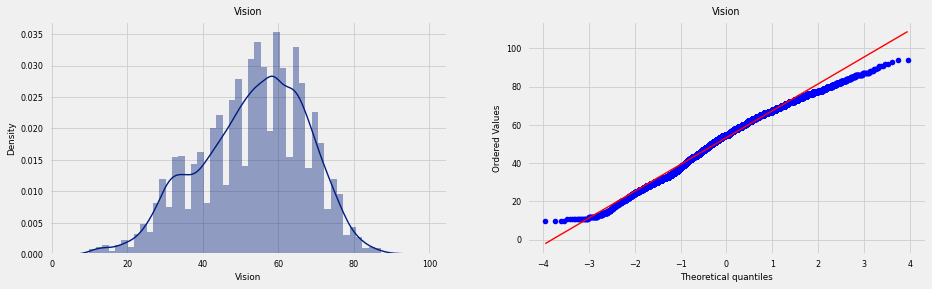

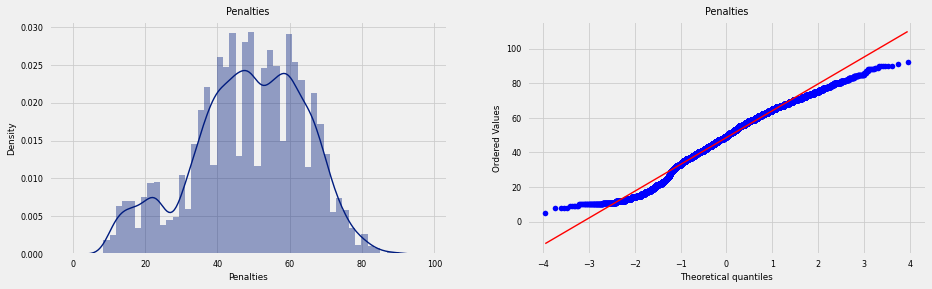

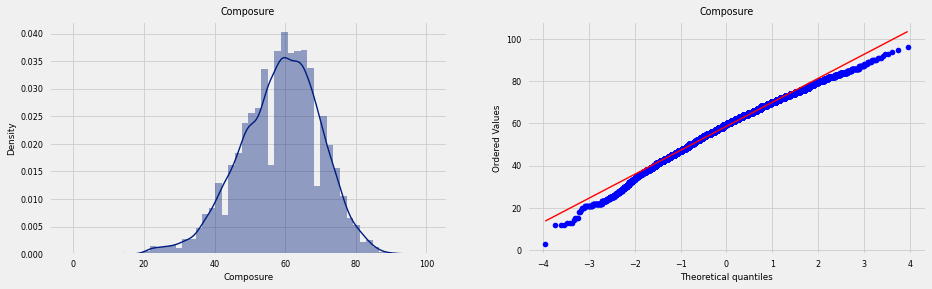

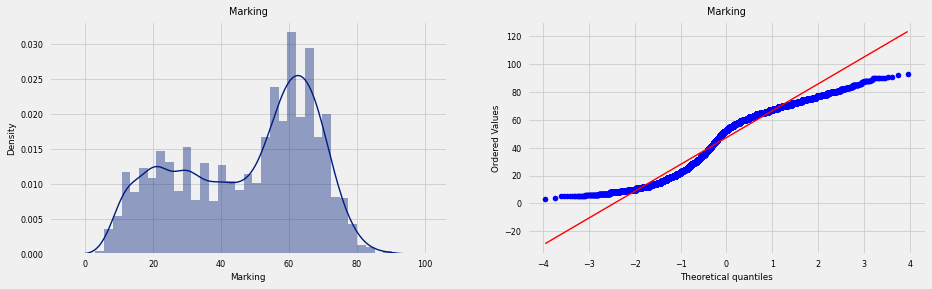

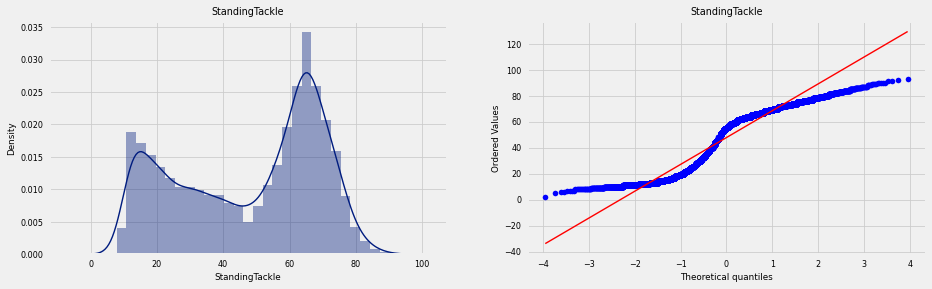

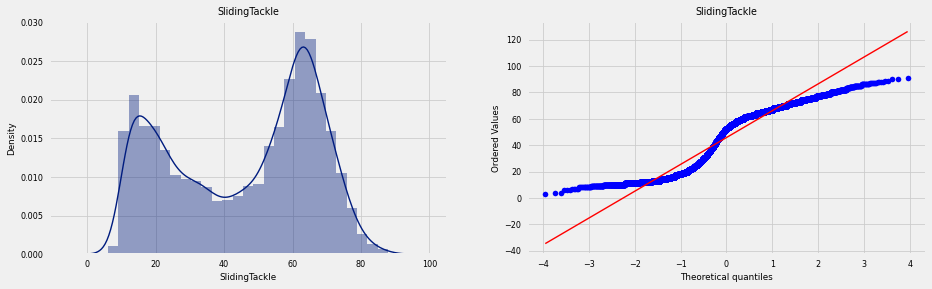

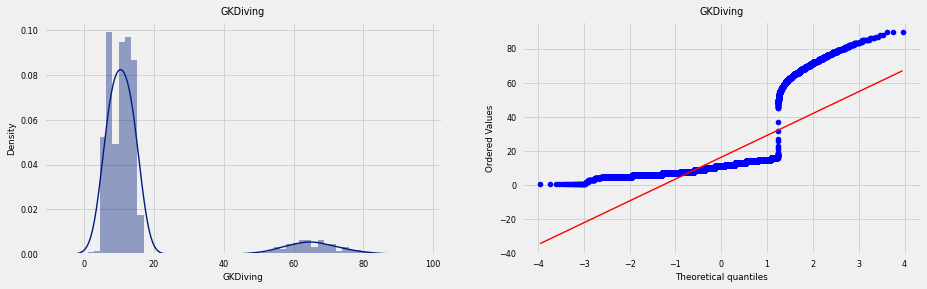

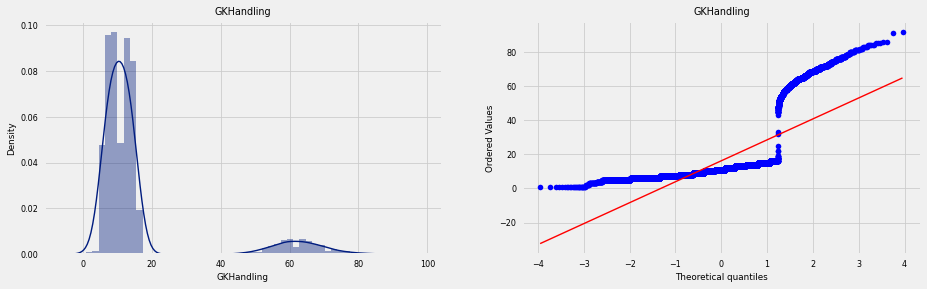

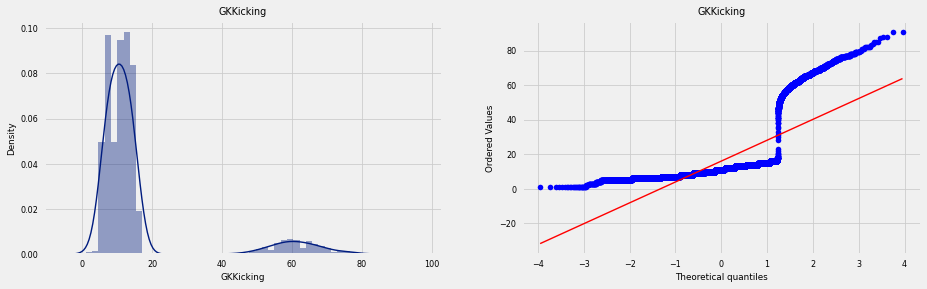

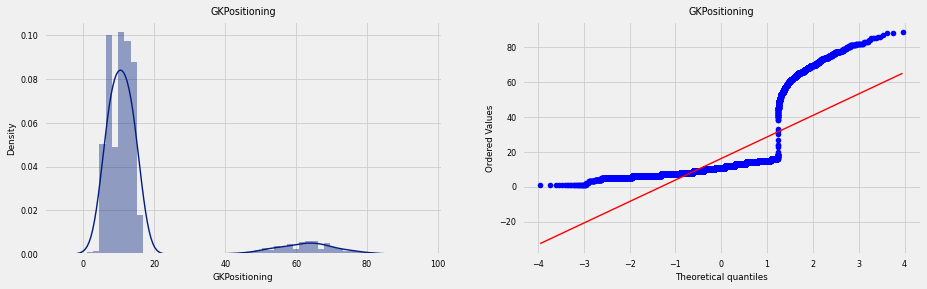

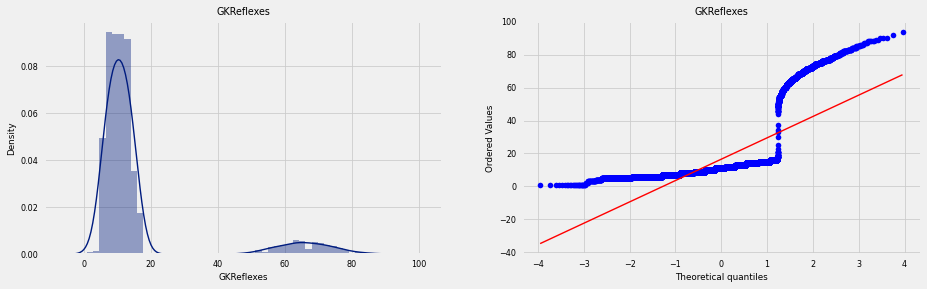

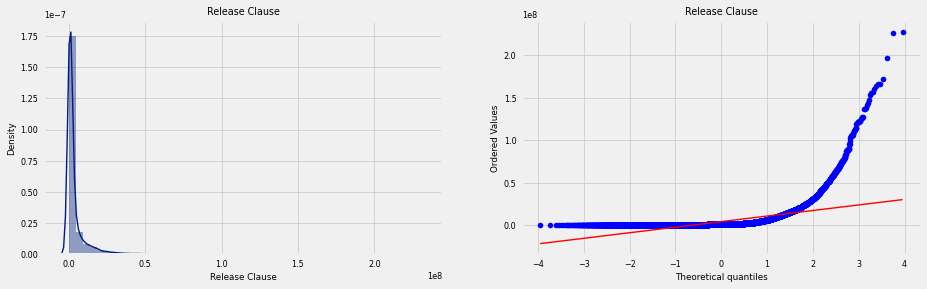

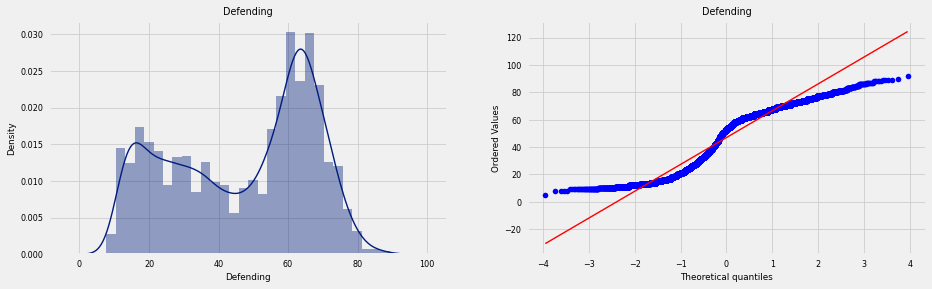

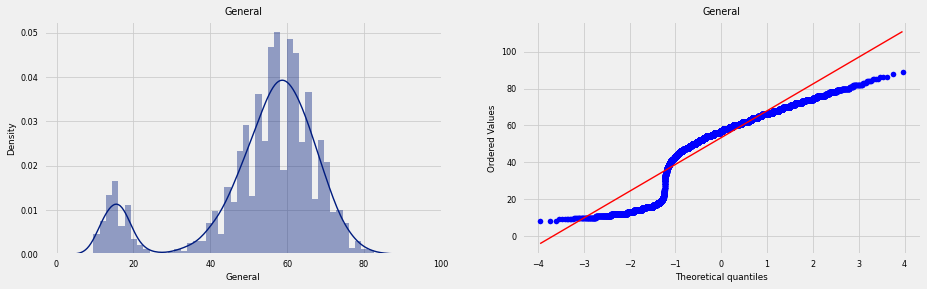

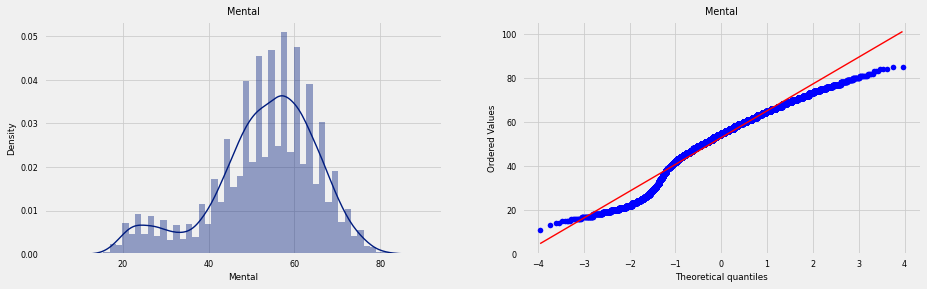

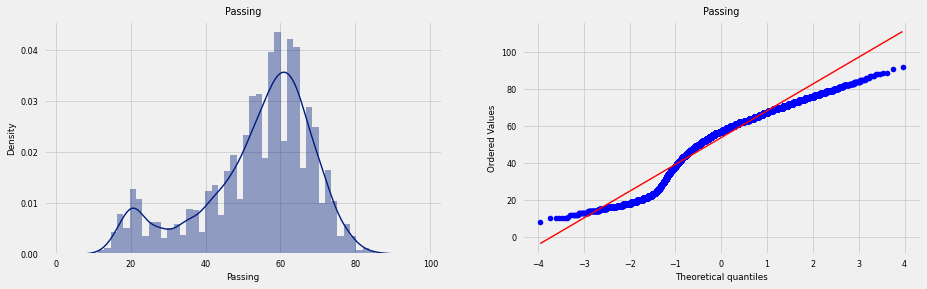

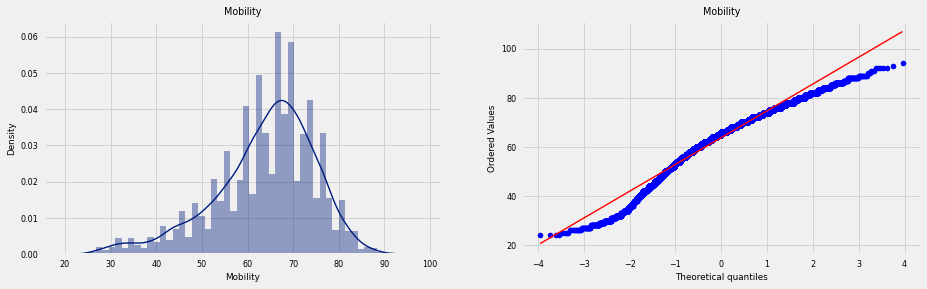

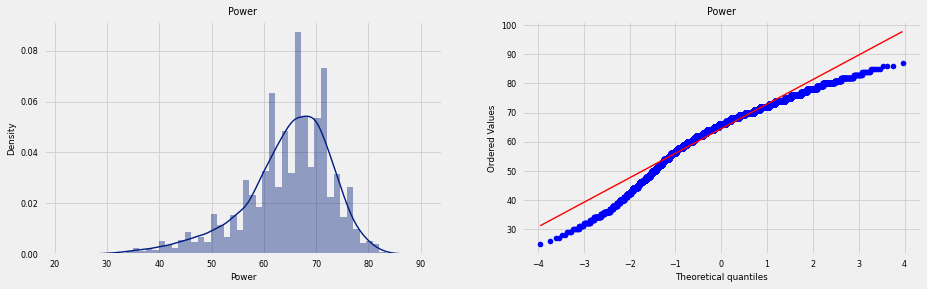

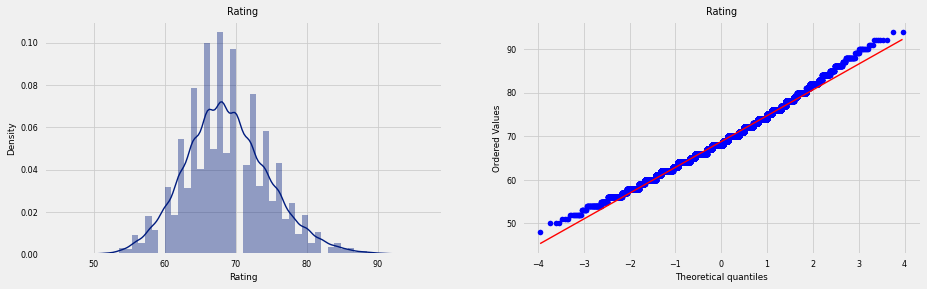

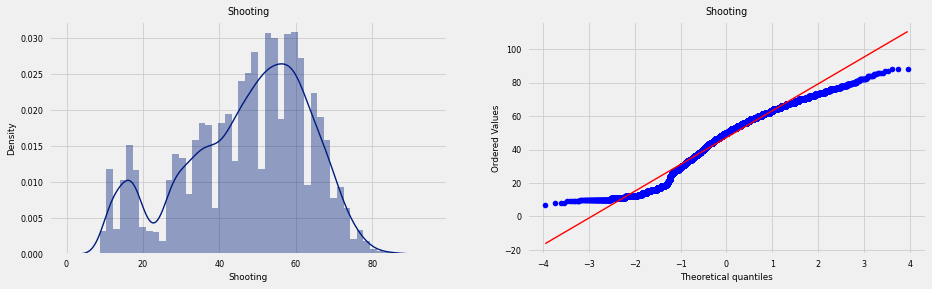

In [60]:
for col in data.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(data[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(data[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [61]:
columns=['ID', 'Name', 'Age', 'Nationality', 'Potential', 'Club',
        'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'Defending', 'General', 'Mental', 'Passing',
       'Mobility', 'Power', 'Rating', 'Shooting','Value','Overall', 'Wage',]
data=data.reindex(columns=columns)

In [62]:
old_train = data.iloc[:,0:88]
y_data = data.iloc[:,-1]


In [63]:
#apply SelectKBest class to extract best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(old_train,y_data)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(old_train.columns)

In [64]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

new_list=(featureScores.nlargest(80,'Score'))

In [65]:
x_data=data[new_list["Specs"]]

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)

In [67]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [68]:
#coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)


Coefficient of model : [ 1.25947947e-03 -9.26473477e-03 -7.58325970e-03 -1.87115246e+01
 -2.28661323e+00 -1.12993131e+01  7.44445689e+01 -9.47774942e+00
 -7.26121729e+01 -7.26121729e+01 -7.26121729e+01 -4.16940298e+01
 -1.89953043e+01 -7.57485388e+01  1.42449406e+02  1.42449406e+02
  1.42449406e+02 -1.78380538e+02 -1.78380538e+02 -1.78380538e+02
  2.02397932e+02 -4.56510903e+01  7.49557426e+00  9.49301692e+01
  9.49301692e+01  9.49301692e+01  2.69253595e+02  2.69253595e+02
 -3.46450916e+02 -3.46450916e+02  1.26775778e+02  1.00471058e+02
 -2.38035809e+02 -6.03001757e+01  2.91093923e+01  2.91093923e+01
  2.91093923e+01  1.62718704e+02 -2.97574012e+01 -1.43554012e+01
  2.43610026e+02 -5.45268851e+01  2.39066296e+02  2.39066296e+02
 -2.88161358e+01 -1.29402500e+02 -1.29402500e+02 -1.29402500e+02
 -1.22941927e+01 -1.22941927e+01 -5.89139449e+01 -2.27388068e+01
  1.22126074e+02 -6.15642609e+00  5.70288276e+01  7.90013287e+01
 -1.26953304e+02  1.08553135e+02 -1.04226545e+01  3.51111310e+02
 

In [69]:
# intercept of the model
print('\nIntercept of model',model.intercept_)


Intercept of model -16048.580469143179


In [70]:
# predict the target on the test dataset
predict = model.predict(x_test)
print(predict) 

[ 3317.15421102  9801.24595817 20886.6170585  ...  -203.68243573
  5701.98544582  1208.5781692 ]


In [71]:
# Root Mean Squared Error on testing dataset
rmse_train = mean_squared_error(y_test,predict)**(0.5)
print('\nRMSE on test dataset : ', rmse_train)


RMSE on test dataset :  10761.07056114611


In [72]:
from sklearn.metrics import r2_score
r2_score(predict,y_test)

0.7099686830097099

In [73]:
model1= DecisionTreeRegressor()

model1.fit(x_train,y_train)

DecisionTreeRegressor()

In [74]:
print('Depth of the Decision Tree :', model1.get_depth())


Depth of the Decision Tree : 37


In [75]:
# predict the target on the test dataset
predict1 = model1.predict(x_test)
print(predict1) 

[ 1000.  5000. 23000. ...  1000.  2000.  2000.]


In [76]:
# Root Mean Squared Error on testing dataset
rmse_train = mean_squared_error(y_test,predict1)**(0.5)
print('\nRMSE on test dataset : ', rmse_train)


RMSE on test dataset :  13135.295284738848


In [77]:
from sklearn.metrics import r2_score
r2_score(predict1,y_test)

0.6193204521749833

In [78]:
model2=RandomForestRegressor(max_depth=3)
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=3)

In [79]:
# predict the target on the test dataset
predict3 = model2.predict(x_test)
print(predict3)

[ 3192.00707422 13220.02568554 24161.16865058 ...  3192.00707422
  5543.78038158  3192.00707422]


In [80]:
from sklearn.metrics import r2_score
r2_score(predict3,y_test)

0.6477130174190973

In [81]:
model = XGBClassifier()
model2.fit(x_train,y_train)

RandomForestRegressor(max_depth=3)

In [82]:
# predict the target on the test dataset
predict3 = model2.predict(x_test)
print(predict3)

[ 3223.02466919 13310.86768198 23566.96816755 ...  3223.02466919
  5591.25399243  3223.02466919]


In [83]:
from sklearn.metrics import r2_score
r2_score(predict3,y_test)

0.6494183488572245